During this assignment, you need to explore the dataset, visualize your findings, and convey the insights that you gain from the dataset.  Then you will clean the dataset using various data processing techniques such as analysis of missing values and outliers, conducting dimension reduction, calculating the statistics of the variables, correlation analysis, and more.  (These are just some examples, you don't need to limit yourself with these techniques)

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from scipy.stats import norm
from scipy.stats import probplot  # Import probplot from scipy.stats
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from yellowbrick.classifier import ROCAUC
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection


In [2]:
# Load the dataset
df = pd.read_csv('telecom_customer_churn.csv')

# Display the first few rows of the dataset
print(df.head())

  Customer ID  Gender  Age Married  Number of Dependents          City   
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park  \
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method   
0     93225  34.827662 -118.999073                    2  ...      Credit Card  \
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

In [3]:
df.describe()

Age  Number of Dependents      Zip Code     Latitude   
count  7043.000000           7043.000000   7043.000000  7043.000000  \
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months   
count  7043.000000          7043.000000       7043.000000  \
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download   
count                        6361.000000              5517.000000  \
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges   
count     7043.000000    7043.000000    7043.000000               7043.000000  \
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
df.drop(columns = ['Customer ID', 'Zip Code', 'Latitude', 'Longitude','City','Zip Code'], inplace = True)

Removing the above columns from the dataset as they do not play any impact on the target variable

In [6]:
df.shape

(7043, 33)

In [7]:
df.isnull().sum()


Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                       0
Payment Method                    

## Data Processing

In [8]:
df = df.drop(columns=['Churn Category', 'Churn Reason'])

We drop the columns Churn Category and Churn Reason as most of the data(5174/7044) is missing and it doesnt play enough role predicting the customer status

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  6361 non-null   float64
 9   Multiple Lines                     6361 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [10]:
df.loc[df['Phone Service'] == 'No', 'Avg Monthly Long Distance Charges'] = 0
df.loc[df['Phone Service'] == 'No', 'Multiple Lines'] = 'No'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

Filled the missing values of columns, Avg Monthly Long Distance Charges and Multiple lines with 0 and No respectively, wherever the Phone Service was No, as it doesnt make sense to have the corresponding with the phone line not being availed in the first place.

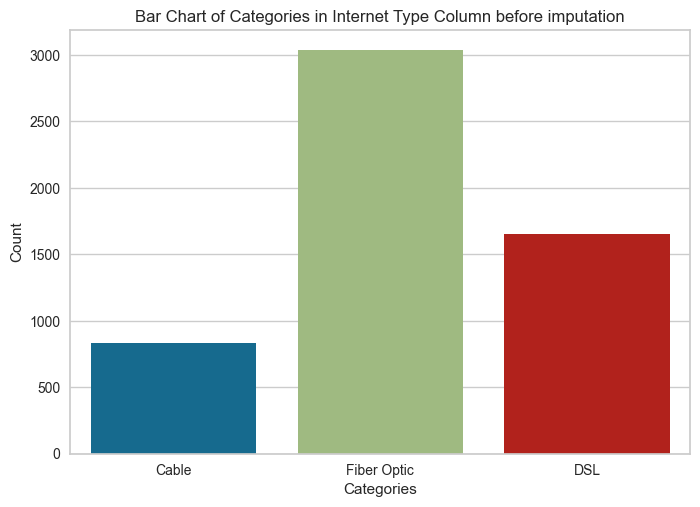

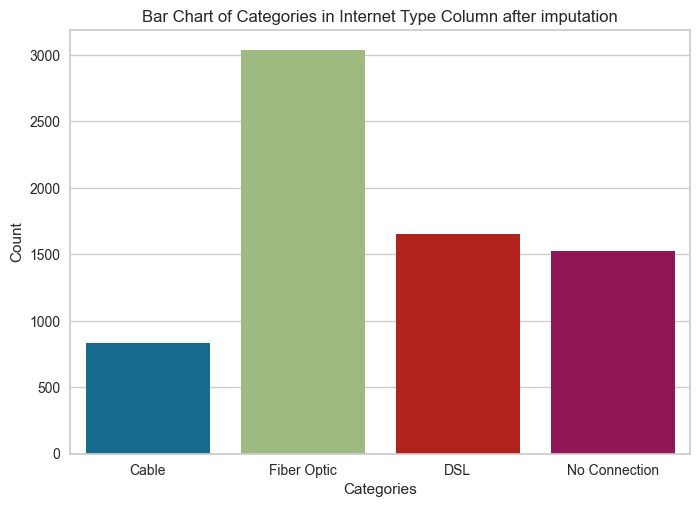

Null Values in Internet Type: 0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Internet Type', data=df)
plt.title('Bar Chart of Categories in Internet Type Column before imputation')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


df.loc[df['Internet Service'] == 'No', 'Internet Type'] = 'No Connection'


sns.countplot(x='Internet Type', data=df)
plt.title('Bar Chart of Categories in Internet Type Column after imputation')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


print("Null Values in Internet Type:",df['Internet Type'].isnull().sum())

Filled the Internet Type with "No Connection" becuase there is no internet service in the first to have a connection type thereby introducing a new category.

In [12]:
df.loc[df['Internet Service'] == 'No', 'Avg Monthly GB Download'] = 0
print("Null Values in Avg Monthly GB Downloaded:",df['Avg Monthly GB Download'].isnull().sum())

Null Values in Avg Monthly GB Downloaded: 0


Filled the Average Monthly GB downloaded with 0GB consumed becuase there is no internet service in the first to compute the average GB per month.

In [13]:
df.loc[df['Internet Service'] == 'No', 'Online Backup'] = "No"
df.loc[df['Internet Service'] == 'No', 'Device Protection Plan'] = "No"
df.loc[df['Internet Service'] == 'No', 'Premium Tech Support'] = "No"
df.loc[df['Internet Service'] == 'No', 'Streaming TV'] = "No"
df.loc[df['Internet Service'] == 'No', 'Streaming Movies'] = "No"
df.loc[df['Internet Service'] == 'No', 'Streaming Music'] = "No"
df.loc[df['Internet Service'] == 'No', 'Unlimited Data'] = "No"
df.loc[df['Internet Service'] == 'No', 'Online Security'] = "No"


Similarly, since it doesnt make sense to have all the above features without the internet service, filled them with the value "No". The trend is not general, it is observed in the dataset.

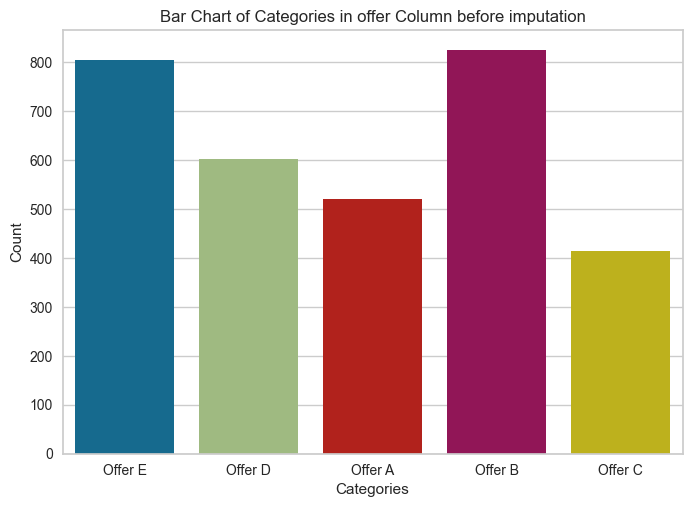

Null Values in Offer column: 0


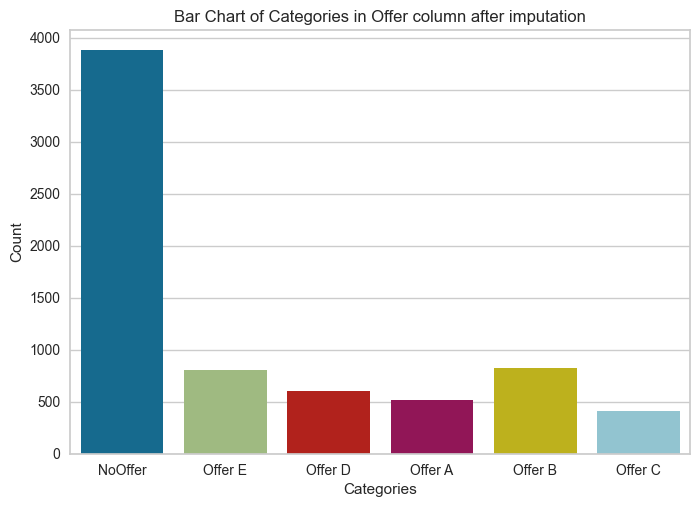

In [14]:
sns.countplot(x='Offer', data=df)
plt.title('Bar Chart of Categories in offer Column before imputation')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

df['Offer'] = df['Offer'].fillna("NoOffer")
print("Null Values in Offer column:",df['Offer'].isnull().sum())

sns.countplot(x='Offer', data=df)
plt.title('Bar Chart of Categories in Offer column after imputation')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

Introduced a new category called No offer instead of the none type, therefore filled the nul values with the "NoOffer"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [16]:
df

Gender  Age Married  Number of Dependents  Number of Referrals   
0     Female   37     Yes                     0                    2  \
1       Male   46      No                     0                    0   
2       Male   50      No                     0                    0   
3       Male   78     Yes                     0                    1   
4     Female   75     Yes                     0                    3   
...      ...  ...     ...                   ...                  ...   
7038  Female   20      No                     0                    0   
7039    Male   40     Yes                     0                    1   
7040    Male   22      No                     0                    0   
7041    Male   21     Yes                     0                    5   
7042    Male   36     Yes                     0                    1   

      Tenure in Months    Offer Phone Service   
0                    9  NoOffer           Yes  \
1                    9  NoOffer           Yes   
2                    4  Offer E           Yes   
3                   13  Offer D           Yes   
4                    3  NoOffer           Yes   
...                ...      ...           ...   
7038                13  Offer D           Yes   
7039                22  Offer D           Yes   
7040                 2  Offer E           Yes   
7041                67  Offer A           Yes   
7042                63  NoOffer            No   

      Avg Monthly Long Distance Charges Multiple Lines  ...        Contract   
0                                 42.39             No  ...        One Year  \
1                                 10.69            Yes  ...  Month-to-Month   
2                                 33.65             No  ...  Month-to-Month   
3                                 27.82             No  ...  Month-to-Month   
4                                  7.38             No  ...  Month-to-Month   
...                                 ...            ...  ...             ...   
7038                              46.68             No  ...        One Year   
7039                              16.20            Yes  ...  Month-to-Month   
7040                              18.62             No  ...  Month-to-Month   
7041                               2.12             No  ...        Two Year   
7042                               0.00             No  ...        Two Year   

     Paperless Billing   Payment Method Monthly Charge Total Charges   
0                  Yes      Credit Card          65.60        593.30  \
1                   No      Credit Card          -4.00        542.40   
2                  Yes  Bank Withdrawal          73.90        280.85   
3                  Yes  Bank Withdrawal          98.00       1237.85   
4                  Yes      Credit Card          83.90        267.40   
...                ...              ...            ...           ...   
7038                No      Credit Card          55.15        742.90   
7039               Yes  Bank Withdrawal          85.10       1873.70   
7040               Yes      Credit Card          50.30         92.75   
7041                No      Credit Card          67.85       4627.65   
7042                No  Bank Withdrawal          59.00       3707.60   

     Total Refunds Total Extra Data Charges Total Long Distance Charges   
0             0.00                        0                      381.51  \
1            38.33                       10                       96.21   
2             0.00                        0                      134.60   
3             0.00                        0                      361.66   
4             0.00                        0                       22.14   
...            ...                      ...                         ...   
7038          0.00                        0                      606.84   
7039          0.00                        0                      356.40   
7040          0.00                        0                    

# Data Visualizations

### Bar Plot for Offer Distribution:

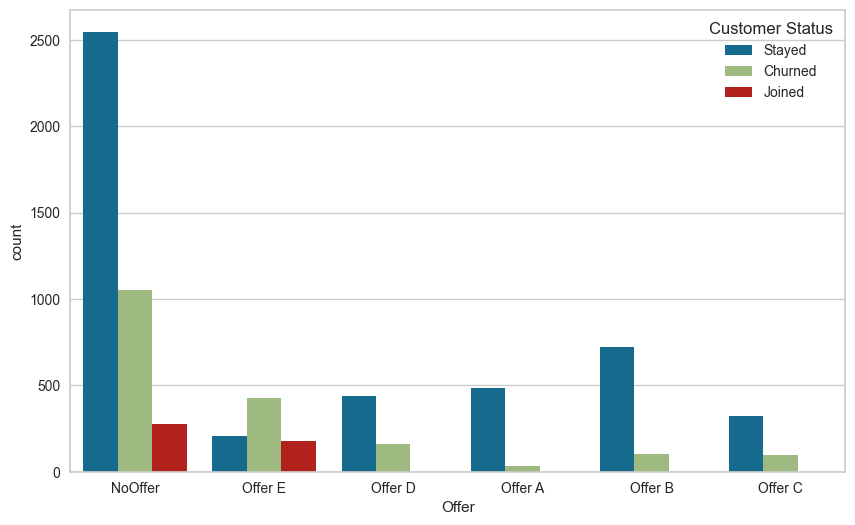

In [17]:


plt.figure(figsize=(10, 6))
sns.countplot(x='Offer', data=df, hue='Customer Status')

# Get the legend and modify it
legend = plt.legend(title='Customer Status', labels=['Stayed', 'Churned', 'Joined'])

# Show the legend
plt.show()


The bar chart provides an overview of customer distribution across different offer categories. Varying bar heights suggest differences in the popularity of each offer. Within each category, color bars represent customer statuses (Stayed, Churned, Joined), aiding in the analysis of which offers attract specific customer segments. Patterns in the highest counts across offers can indicate general preferences within customer statuses. Considerations include sample size and offer details for more nuanced insights.

### Visualize the distribution of ages

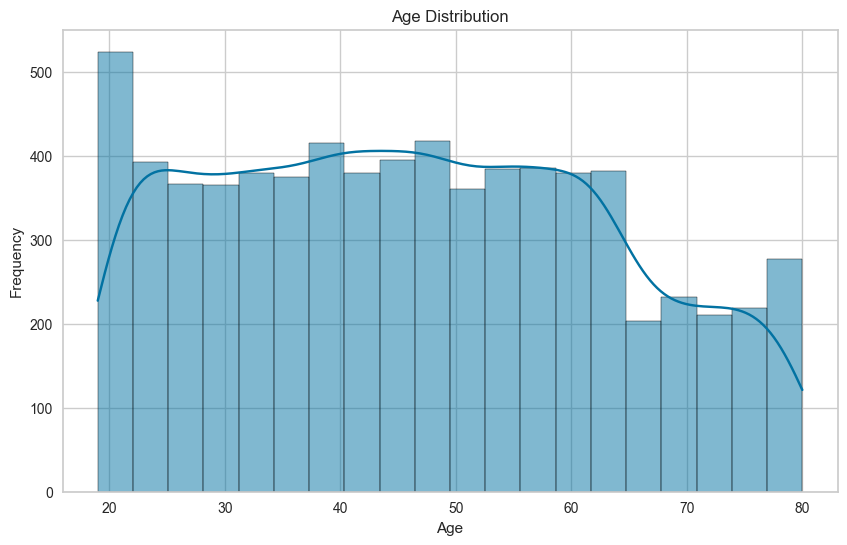

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Explore the spread of monthly charges.

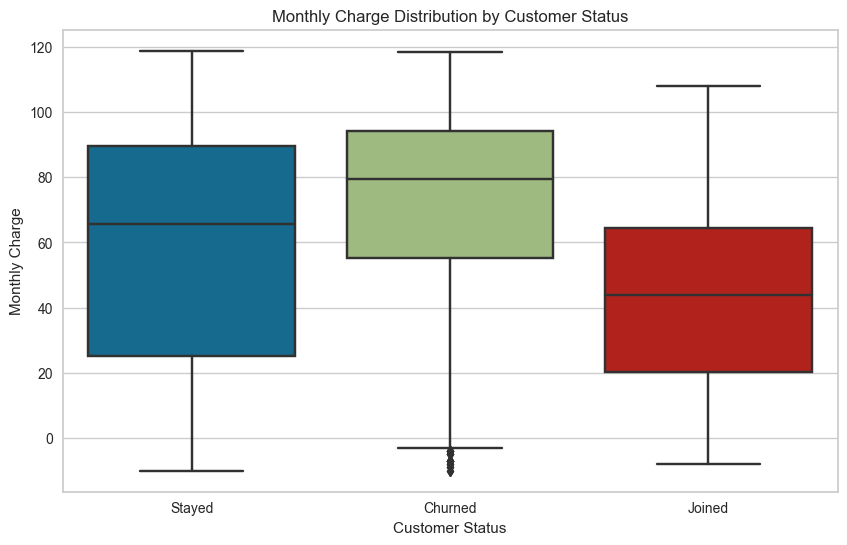

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Status', y='Monthly Charge', data=df)
plt.title('Monthly Charge Distribution by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')

# Set x-axis ticks to be the actual categorical values
plt.xticks(ticks=[0, 1, 2], labels=['Stayed', 'Churned', 'Joined'])

plt.show()


The boxplot analysis of monthly charges across customer statuses reveals distinct spending patterns. Stayed customers tend to have higher and more consistent charges, while Churned customers exhibit lower and slightly more variable charges. Joined customers show diverse spending habits, possibly reflecting early-stage engagement. Understanding these patterns is crucial for segmentation, churn prediction, and targeted marketing strategies.

### Plot the cumulative distribution function for tenure

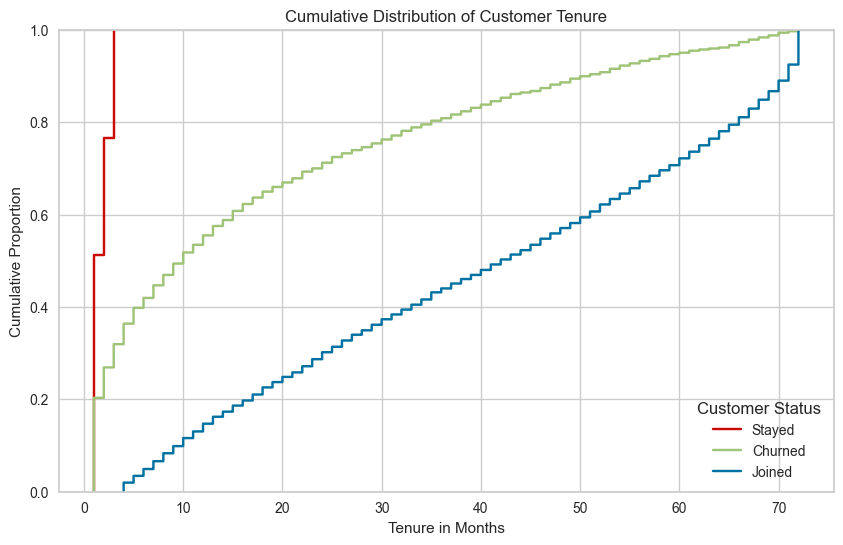

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the cumulative distribution function for tenure
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Tenure in Months', hue='Customer Status')

# Add labels and title
plt.title('Cumulative Distribution of Customer Tenure')
plt.xlabel('Tenure in Months')
plt.ylabel('Cumulative Proportion')

# Add a legend
plt.legend(title='Customer Status', labels=['Stayed', 'Churned', 'Joined'])

# Show the plot
plt.show()


Overall tenure: Most customers churn within the first 20 months, regardless of status.
Stayed customers: Have the highest retention rate, with 50% lasting over 40 months and 20% exceeding 60 months.
Churned customers: Have the lowest retention rate, with 50% churning before 10 months and almost all gone by 40 months.
Joined customers: Fall somewhere in between, with 50% lasting over 20 months but not showing the same long-term retention as Stayed customers.
This suggests focusing efforts on retaining Joined customers early on and understanding why Stayed customers stay loyal for longer.

### Violin Plot between Age and Avg Monthly Long Disstance Charges

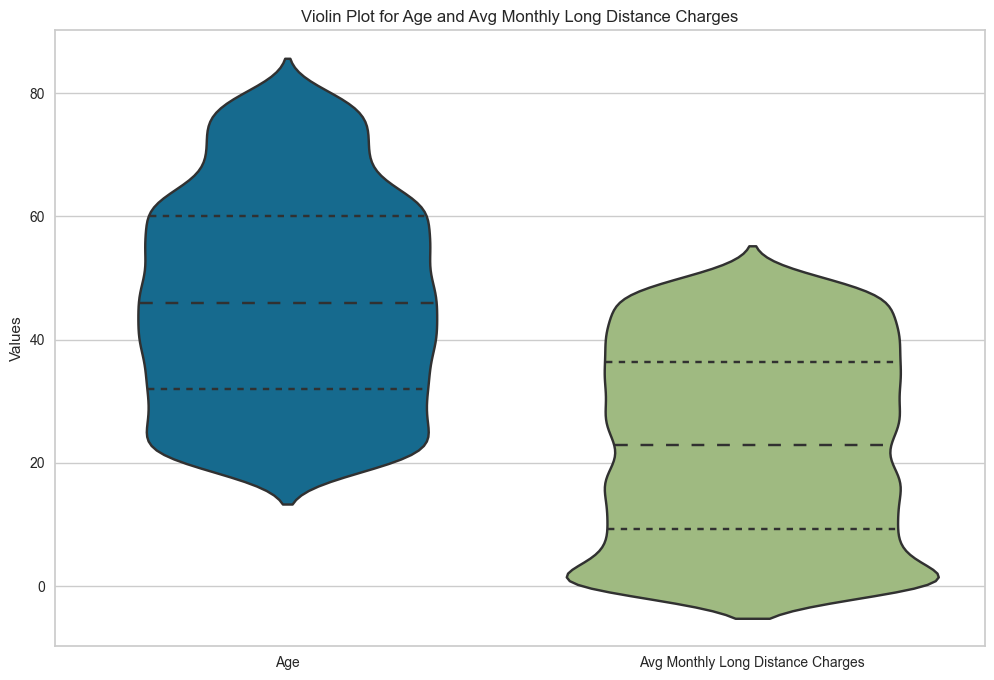

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose two random variables for the violin plot
selected_variables = ['Age', 'Avg Monthly Long Distance Charges']

# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df[selected_variables], inner='quartile')

# Add labels and title
plt.title('Violin Plot for Age and Avg Monthly Long Distance Charges')
plt.ylabel('Values')

# Show the plot
plt.show()


The violin plot reveals a wider age distribution with a median around 40-50 years, skewed to the right. Avg Monthly Long Distance Charges exhibit concentrated values around $20-$30 with outliers indicating higher charges. No clear correlation between age and charges is observed, suggesting age may not strongly predict these charges.

### Interactive box plot for the 'Monthly Charge' distribution by 'Customer Status'.

In [22]:
import plotly.express as px

# Create an interactive scatter plot using plotly express
fig = px.scatter(df, x='Age', y='Total Charges', color='Customer Status',
                 labels={'Age': 'Age', 'Total Charges': 'Total Charges', 'Customer Status': 'Customer Status'},
                 title='Scatter Plot of Age vs Total Charges by Customer Status',
                 category_orders={'Customer Status': ['Stayed', 'Churned', 'Joined']},
                 color_discrete_map={'Stayed': 'blue', 'Churned': 'orange', 'Joined': 'green'})

# Add a custom legend with explicit labels
fig.update_layout(
    legend=dict(
        title='Customer Status',
        traceorder='normal',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        itemsizing='constant'
    )
)

# Show the plot
fig.show()


The graph provides a helpful visual summary of the relationship between age, total charges, and customer status. Further analysis considering specific data values and potentially using interactive features could provide deeper insights into customer behavior and segmentation.

# Data Exploration

## Statistical Plots

<Figure size 800x500 with 0 Axes>

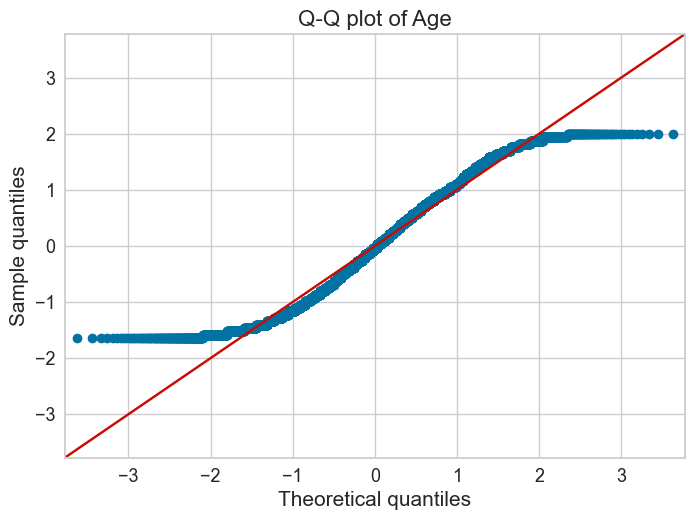

<Figure size 800x500 with 0 Axes>

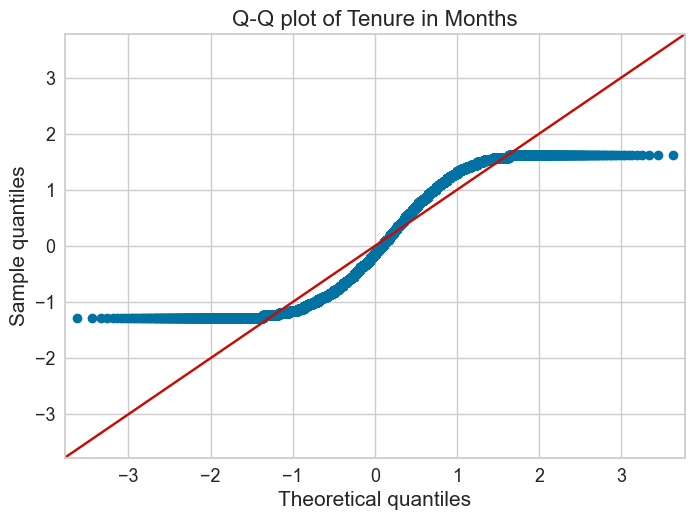

<Figure size 800x500 with 0 Axes>

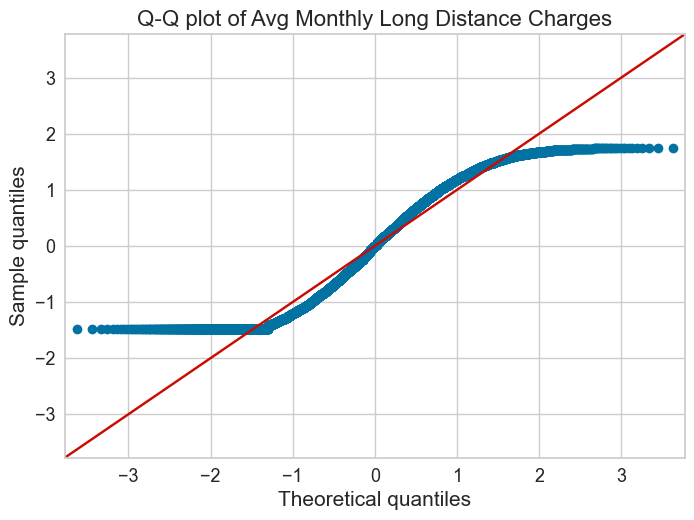

<Figure size 800x500 with 0 Axes>

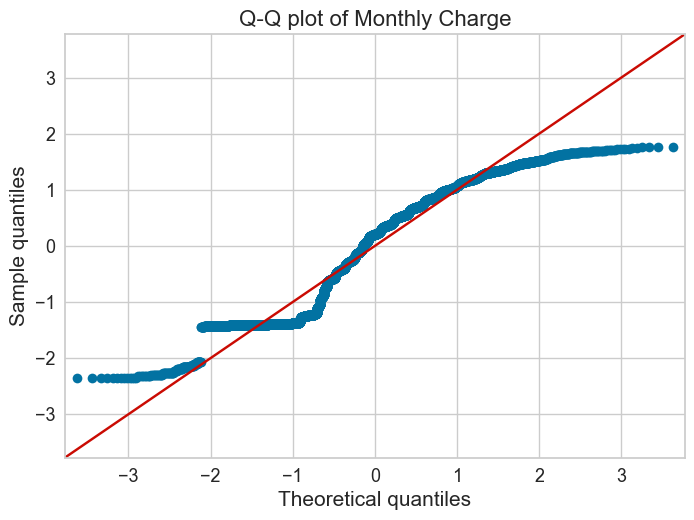

<Figure size 800x500 with 0 Axes>

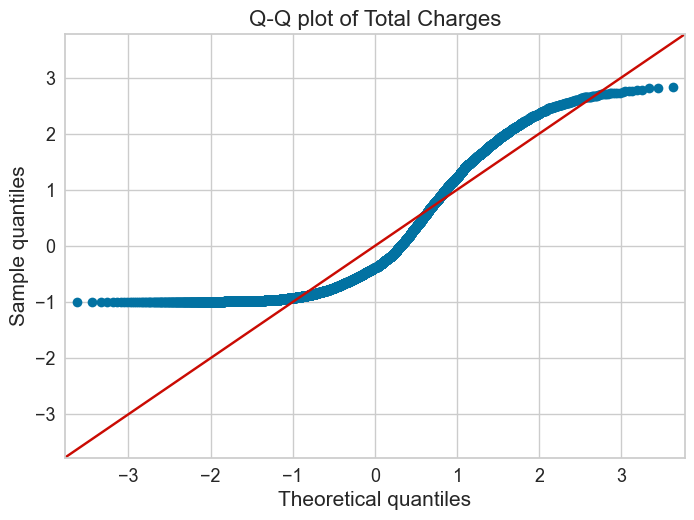

<Figure size 800x500 with 0 Axes>

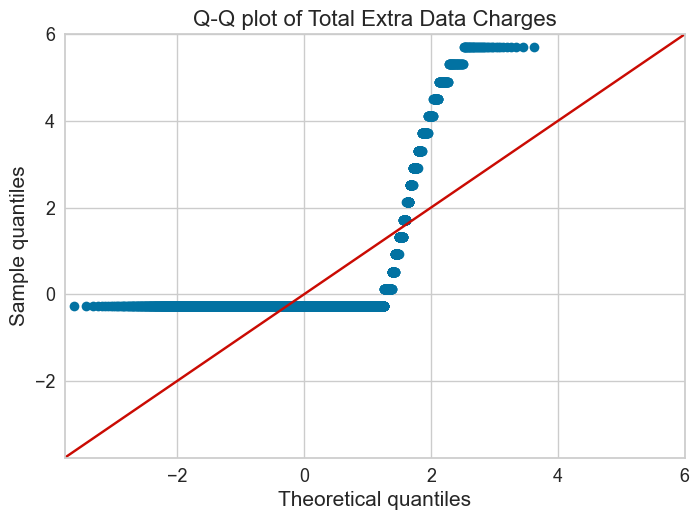

<Figure size 800x500 with 0 Axes>

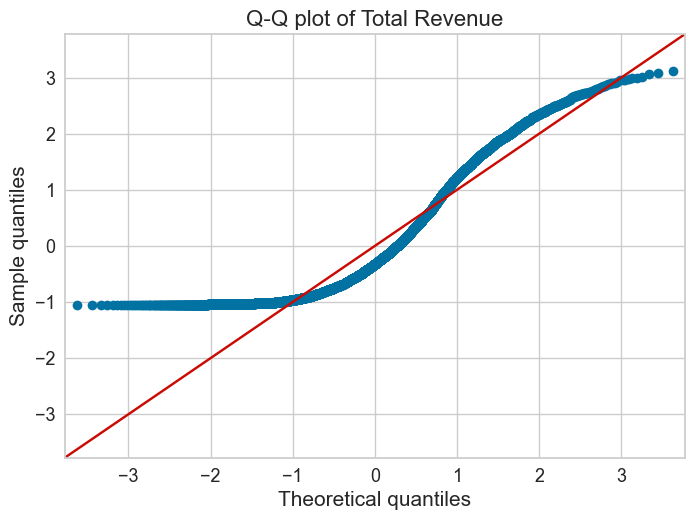

In [23]:
# checking the distribution of independent  numeric variables
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

data_norm = df[
    ["Age",
    "Tenure in Months",
     "Avg Monthly Long Distance Charges",
     "Monthly Charge",
     "Total Charges",
     "Total Extra Data Charges",
     "Total Revenue"]
]

# Iterate through columns and create Q-Q plots
for i in data_norm.columns:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[i], line="45", fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(i), fontsize=16)
    plt.grid(True)
    plt.show()


Looking at the Q-Q plot above, all independent variables are roughly following normal distribution

## Data Exploration

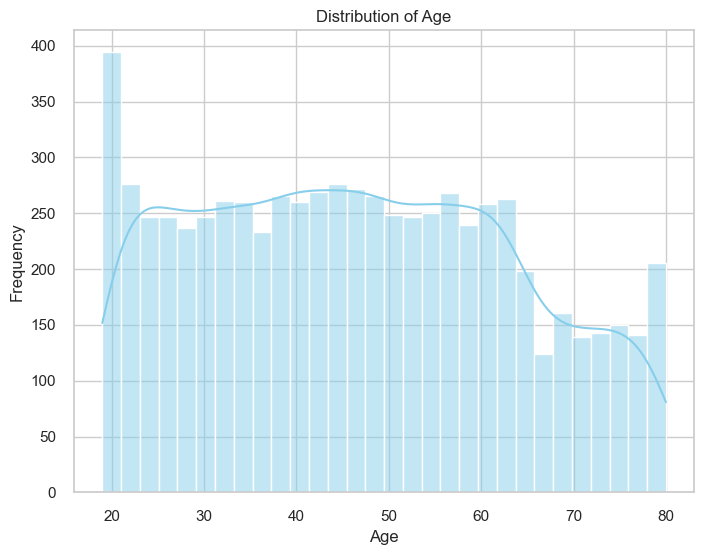

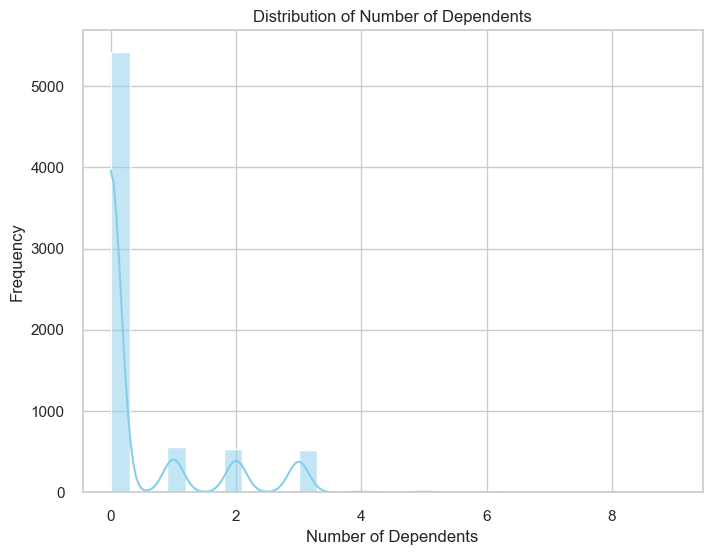

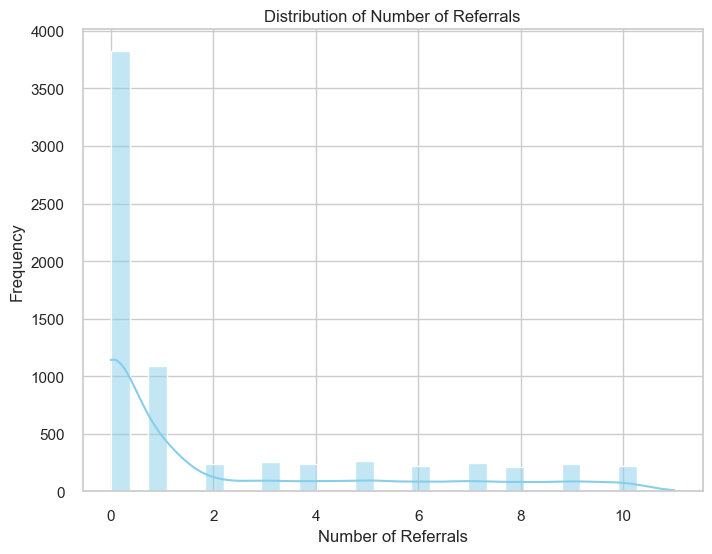

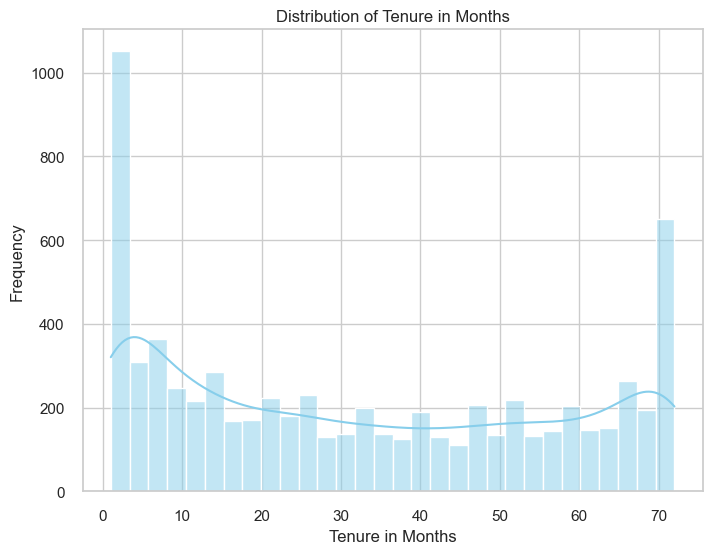

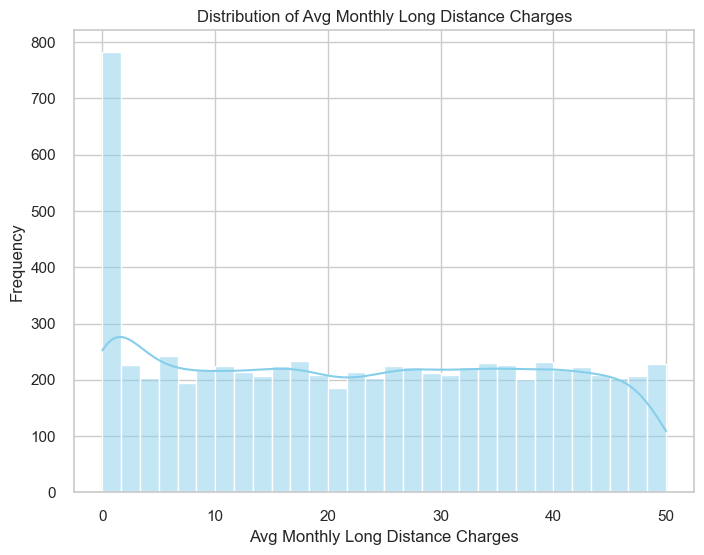

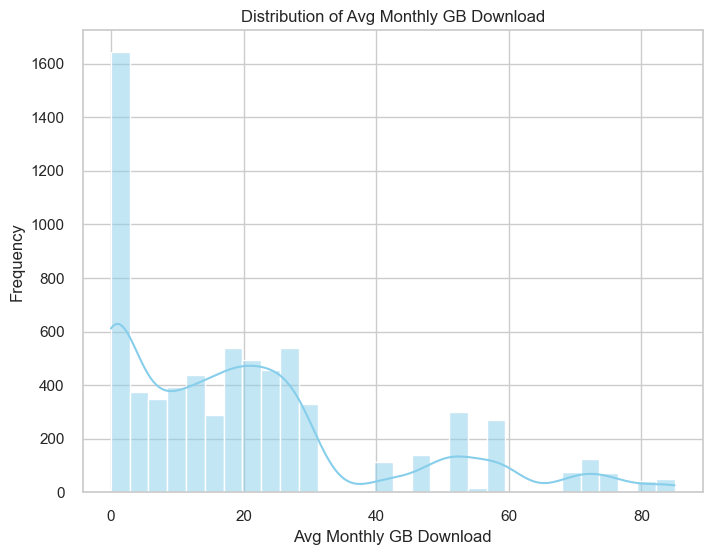

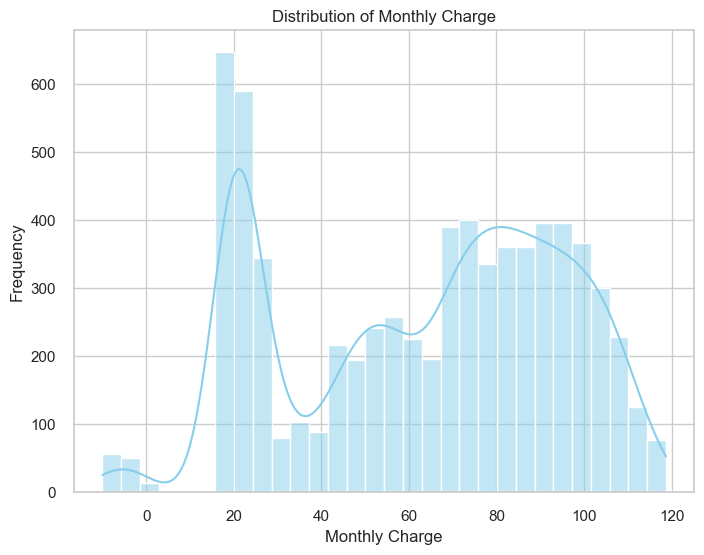

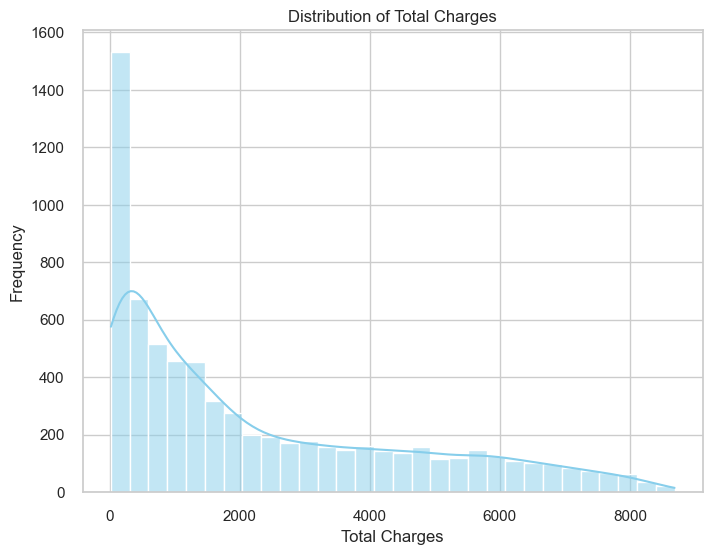

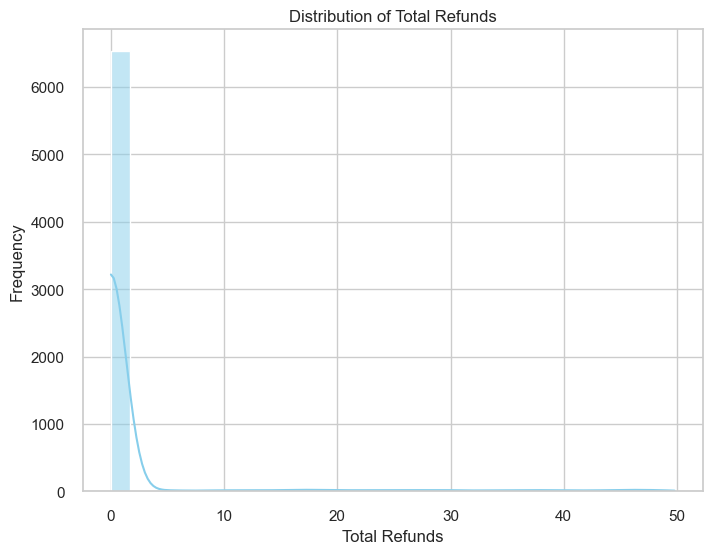

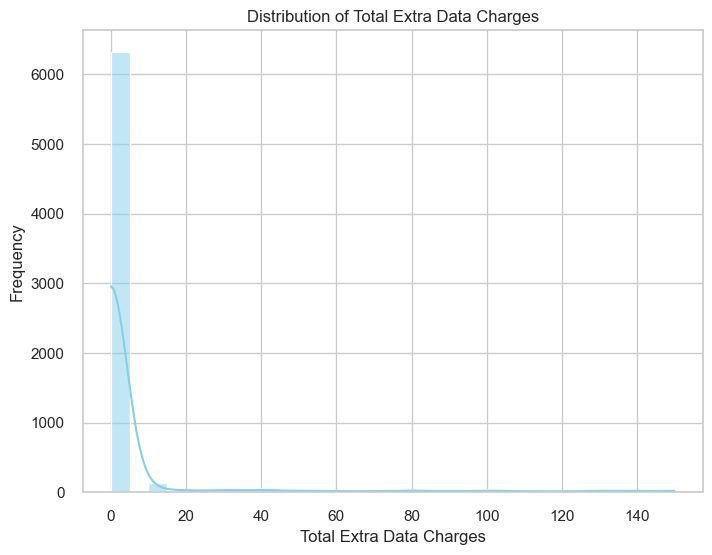

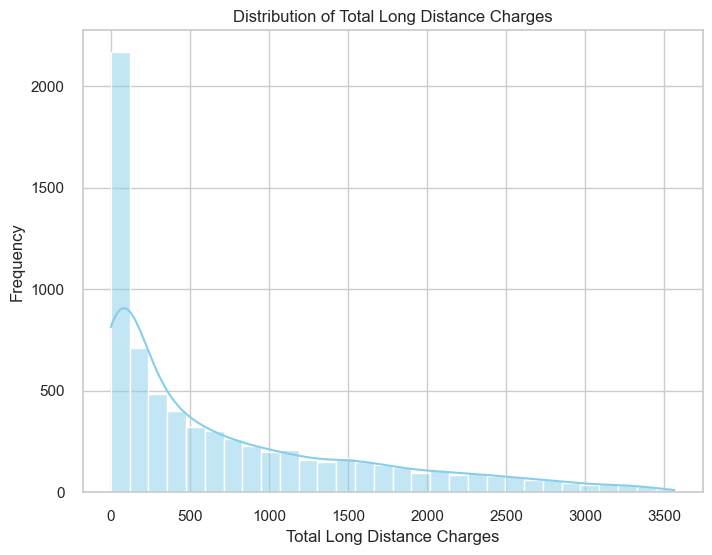

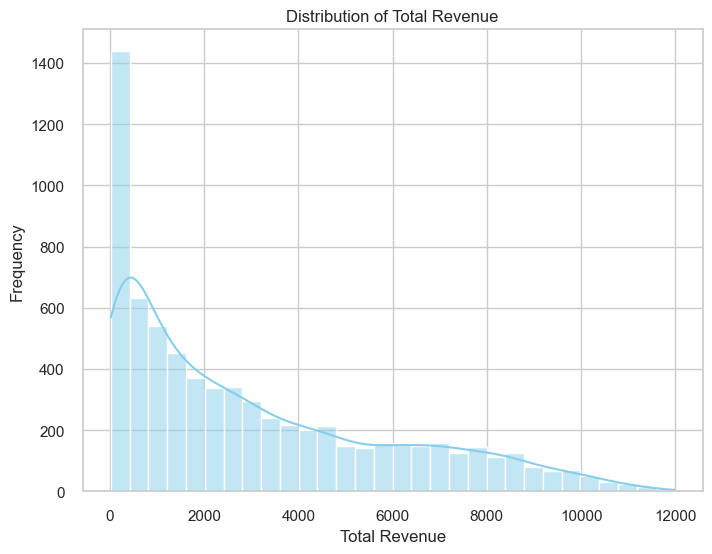

In [24]:
# Selecting numerical columns for distribution plots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set the style of seaborn
sns.set(style="whitegrid")

# Loop through each numerical column and create separate plots
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis.

C:\Users\rohit\AppData\Local\Temp\ipykernel_21372\3575170391.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Log_Total_revenue_log Distribution Plot')

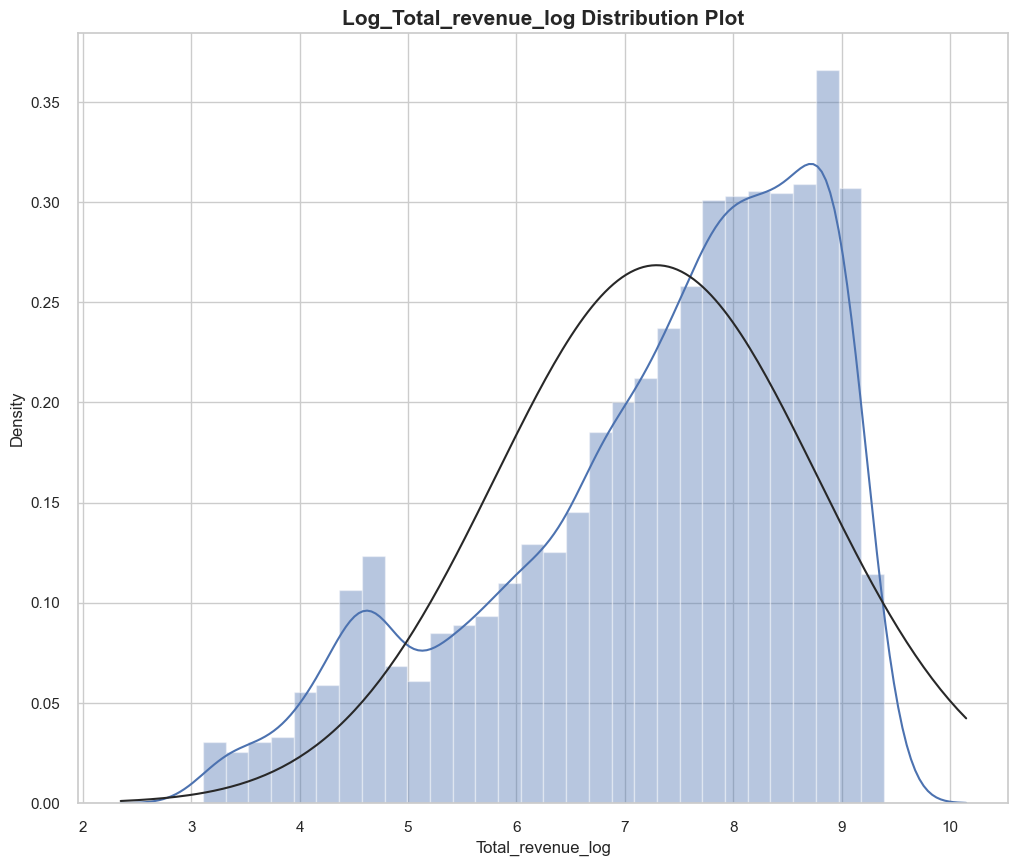

In [25]:
df['Total_revenue_log'] = np.log(df['Total Revenue'] + 1)
plt.figure(figsize=(12,10))
sns.distplot(df['Total_revenue_log'], fit=norm)
plt.title("Log_Total_revenue_log Distribution Plot",size=15, weight='bold')


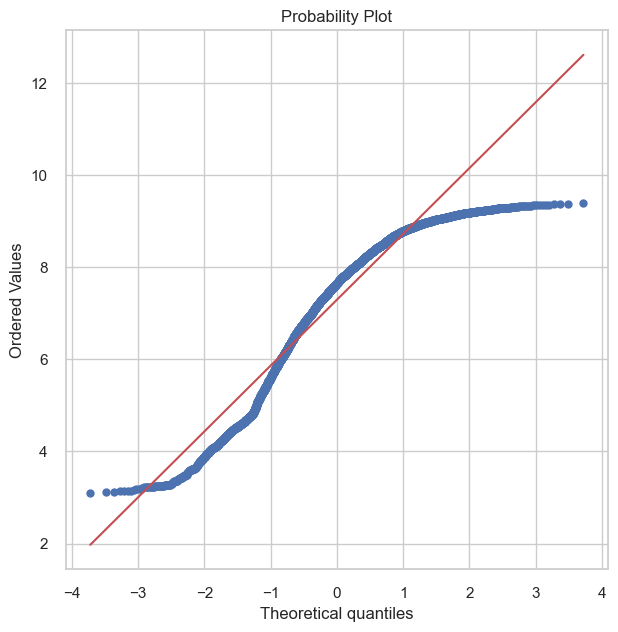

In [26]:
plt.figure(figsize=(7,7))
stats.probplot(df['Total_revenue_log'], plot=plt)
plt.show()

In below above, the good fit indicates that normality is a reasonable approximation

In [27]:
categorical_data = df.select_dtypes(["object"]).columns.tolist()
numerical_data = df.select_dtypes(["float64","int64"]).columns.tolist()

Seperating all the Categorical Values and the Numerical Values so as to encode the categorical values for the further analysis.

In [28]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df[categorical_data] = df[categorical_data].apply(labelencoder.fit_transform)
df

Gender  Age  Married  Number of Dependents  Number of Referrals   
0          0   37        1                     0                    2  \
1          1   46        0                     0                    0   
2          1   50        0                     0                    0   
3          1   78        1                     0                    1   
4          0   75        1                     0                    3   
...      ...  ...      ...                   ...                  ...   
7038       0   20        0                     0                    0   
7039       1   40        1                     0                    1   
7040       1   22        0                     0                    0   
7041       1   21        1                     0                    5   
7042       1   36        1                     0                    1   

      Tenure in Months  Offer  Phone Service   
0                    9      0              1  \
1                    9      0              1   
2                    4      5              1   
3                   13      4              1   
4                    3      0              1   
...                ...    ...            ...   
7038                13      4              1   
7039                22      4              1   
7040                 2      5              1   
7041                67      1              1   
7042                63      0              0   

      Avg Monthly Long Distance Charges  Multiple Lines  ...   
0                                 42.39               0  ...  \
1                                 10.69               1  ...   
2                                 33.65               0  ...   
3                                 27.82               0  ...   
4                                  7.38               0  ...   
...                                 ...             ...  ...   
7038                              46.68               0  ...   
7039                              16.20               1  ...   
7040                              18.62               0  ...   
7041                               2.12               0  ...   
7042                               0.00               0  ...   

      Paperless Billing  Payment Method  Monthly Charge  Total Charges   
0                     1               1           65.60         593.30  \
1                     0               1           -4.00         542.40   
2                     1               0           73.90         280.85   
3                     1               0           98.00        1237.85   
4                     1               1           83.90         267.40   
...                 ...             ...             ...            ...   
7038                  0               1           55.15         742.90   
7039                  1               0           85.10        1873.70   
7040                  1               1           50.30          92.75   
7041                  0               1           67.85        4627.65   
7042                  0               0           59.00        3707.60   

      Total Refunds  Total Extra Data Charges  Total Long Distance Charges   
0              0.00                         0                       381.51  \
1             38.33                        10                        96.21   
2              0.00                         0                       134.60   
3              0.00                         0                       361.66   
4              0.00                         0                        22.14   
...             ...                       ...                          ...   
7038           0.00                         0                       606.84   
7039           0.00                         0                       356.40   
7040           0.00                         0                        37.24   
7041           0.00                         0                       142.04   
7042           0.00                 

Encoded all the categorical data thereby having a int dataset throughout. Enabling us to plot a correlation matrix.

In [29]:
df.corr()

Gender       Age   Married   
Gender                             1.000000  0.002186 -0.001808  \
Age                                0.002186  1.000000 -0.003666   
Married                           -0.001808 -0.003666  1.000000   
Number of Dependents               0.005840 -0.119000  0.324205   
Number of Referrals               -0.009074 -0.025141  0.672867   
Tenure in Months                   0.005162  0.009927  0.380394   
Offer                              0.016956 -0.029311 -0.127423   
Phone Service                     -0.006488  0.009965  0.017706   
Avg Monthly Long Distance Charges  0.010130 -0.011749  0.010215   
Multiple Lines                    -0.008414  0.103122  0.142057   
Internet Service                  -0.006026  0.117346 -0.000615   
Internet Type                      0.003217  0.000809 -0.001627   
Avg Monthly GB Download           -0.014065 -0.376595  0.056745   
Online Security                   -0.017021 -0.038001  0.143106   
Online Backup                     -0.013773  0.035541  0.141498   
Device Protection Plan            -0.002105  0.028491  0.153786   
Premium Tech Support              -0.009212 -0.043760  0.119999   
Streaming TV                      -0.008393  0.059760  0.124666   
Streaming Movies                  -0.010487  0.073458  0.117412   
Streaming Music                   -0.007625 -0.155400  0.088700   
Unlimited Data                    -0.000648  0.084353  0.018792   
Contract                          -0.000430  0.027870  0.277700   
Paperless Billing                 -0.011754  0.100723 -0.014877   
Payment Method                     0.009836 -0.112154 -0.034503   
Monthly Charge                    -0.020073  0.134511  0.094775   
Total Charges                     -0.000152  0.059684  0.317777   
Total Refunds                      0.004725  0.024168  0.040142   
Total Extra Data Charges          -0.001921  0.025036  0.017882   
Total Long Distance Charges        0.011092  0.003065  0.264230   
Total Revenue                      0.003127  0.048265  0.329469   
Customer Status                    0.004183 -0.100421  0.194998   
Total_revenue_log                 -0.004461  0.054384  0.346179   

                                   Number of Dependents  Number of Referrals   
Gender                                         0.005840            -0.009074  \
Age                                           -0.119000            -0.025141   
Married                                        0.324205             0.672867   
Number of Dependents                           1.000000             0.278003   
Number of Referrals                            0.278003             1.000000   
Tenure in Months                               0.108237             0.326975   
Offer                                         -0.030712            -0.107161   
Phone Service                                 -0.010149             0.009947   
Avg Monthly Long Distance Charges             -0.007324             0.006336   
Multiple Lines                                -0.030307             0.078080   
Internet Service                              -0.153137            -0.038984   
Internet Type                                  0.059232             0.002913   
Avg Monthly GB Download                        0.129966             0.038575   
Online Security                                0.041977             0.142416   
Online Backup                                  0.001721             0.112369   
Device Protection Plan                        -0.019925             0.116695   
Premium Tech Support                           0.022094             0.107725   
Streaming TV                                  -0.052981             0.079687   
Streaming Movies                              -0.065215             0.057821   
Streaming Music                               -0.033048             0.051349   
Unlimited Data                                -0.113853            -0.005813   
Contract                                       0.146790          

<Axes: >

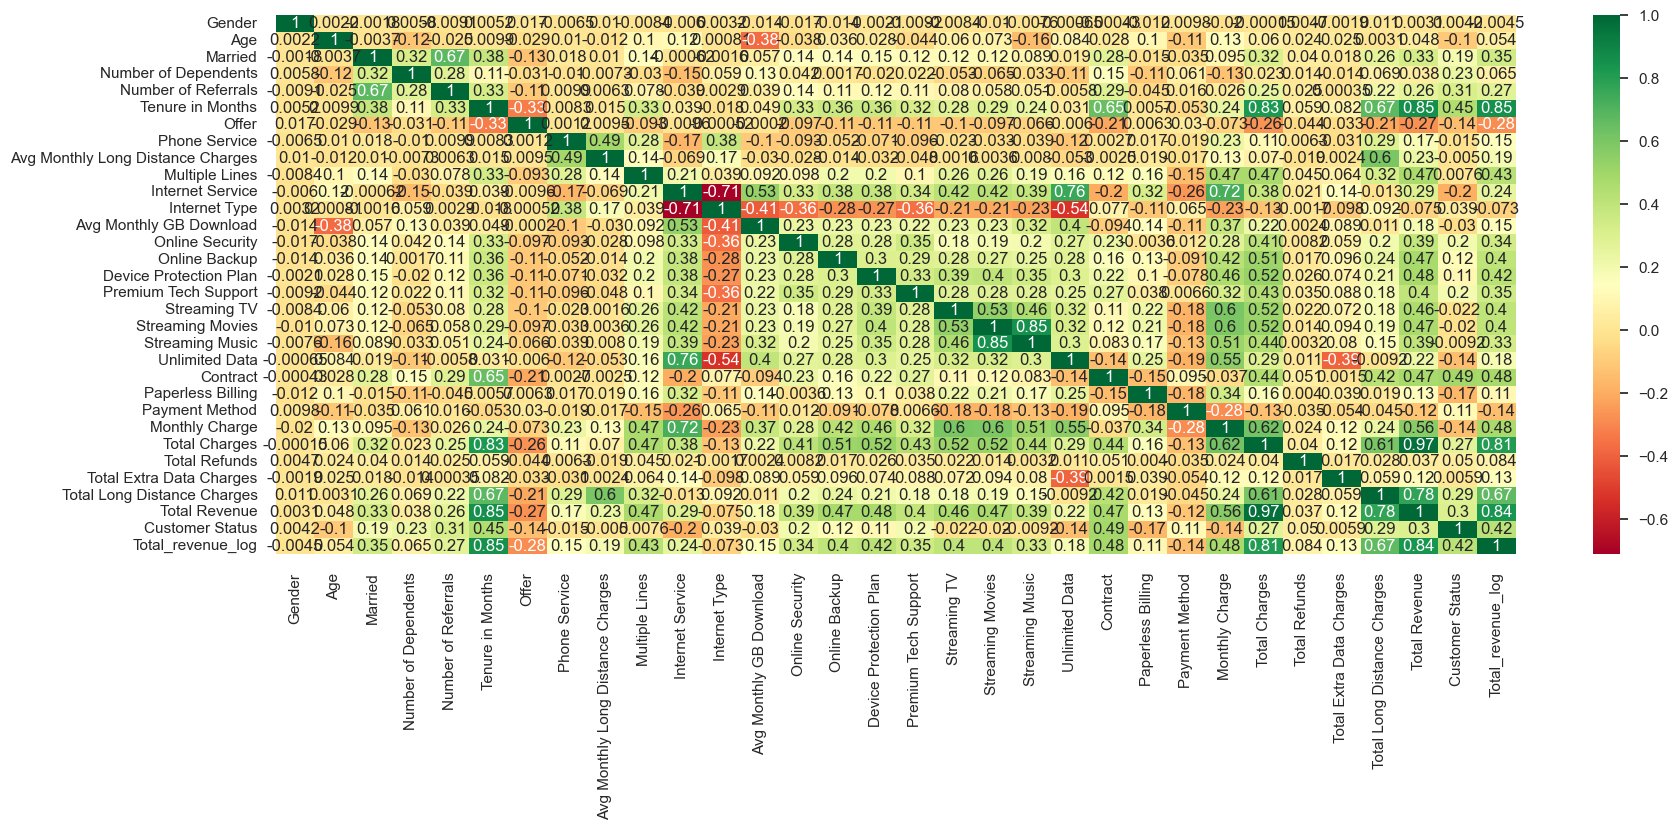

In [30]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

We can see there are lot of co-relation among the variables.
Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Highest correlation is between total revenue and total charges followed by tenure of months and total revenue; and total charges and tenure of months .

## Normlization

In [31]:
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_data] = scaler.fit_transform(df[numerical_data])



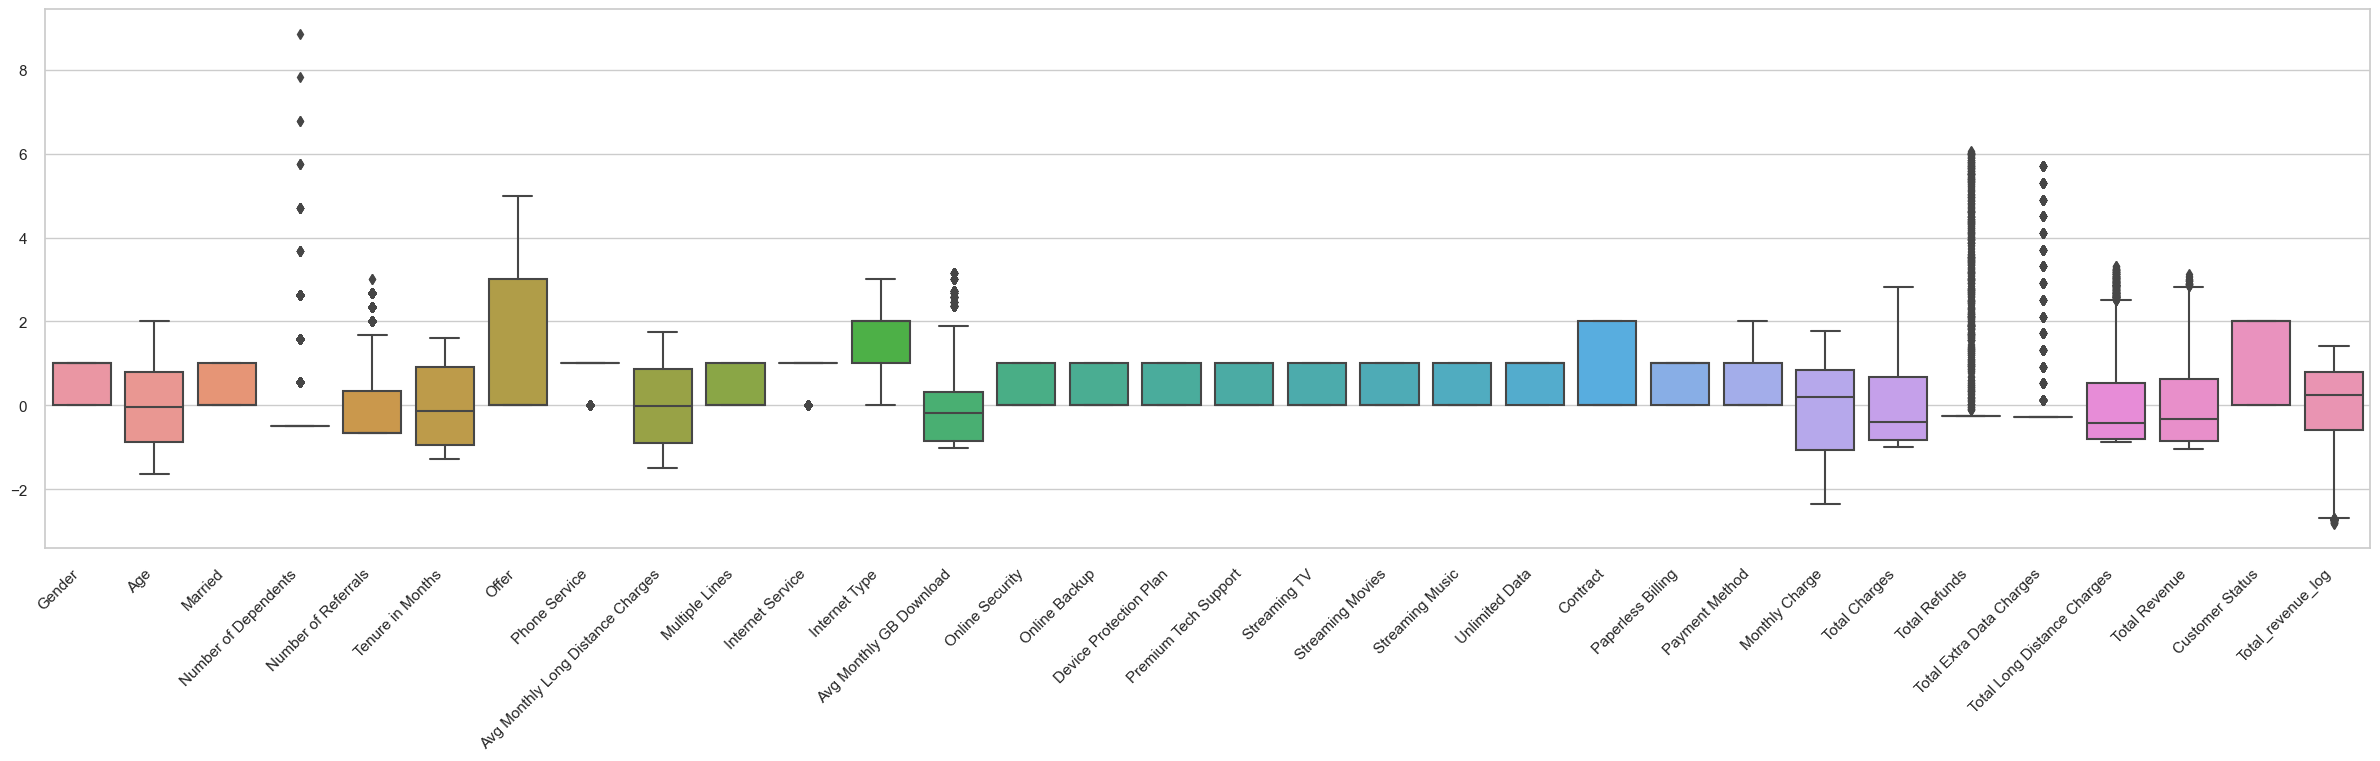

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 7))
sns.boxplot(data=df)

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

plt.show()


Now it is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:

No of Dependents, No of references , internet service, unlimited data, extra data charges and Customer Status has outliers meaning that few abalones survied and grew longer and heavier then expected.

Few values in independent variables are very small and close to zero which makes sense as the Infant will have very small physical attributes.


## Handling Outliers

In [33]:

def outlier_treatment(df):
    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Loop through each numeric column
    for column in numeric_columns:
        # Calculate the z-score for each data point in the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()

        # Define the threshold for outliers
        threshold = 3

        # Identify outlier indices
        outlier_indices = np.abs(z_scores) > threshold

        # Replace outlier values with the median
        df.loc[outlier_indices, column] = df[column].median()

    return df

data = outlier_treatment(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Number of Dependents'),
  Text(2, 0, 'Number of Referrals'),
  Text(3, 0, 'Tenure in Months'),
  Text(4, 0, 'Avg Monthly Long Distance Charges'),
  Text(5, 0, 'Avg Monthly GB Download'),
  Text(6, 0, 'Monthly Charge'),
  Text(7, 0, 'Total Charges'),
  Text(8, 0, 'Total Refunds'),
  Text(9, 0, 'Total Extra Data Charges'),
  Text(10, 0, 'Total Long Distance Charges'),
  Text(11, 0, 'Total Revenue'),
  Text(12, 0, 'Total_revenue_log')])

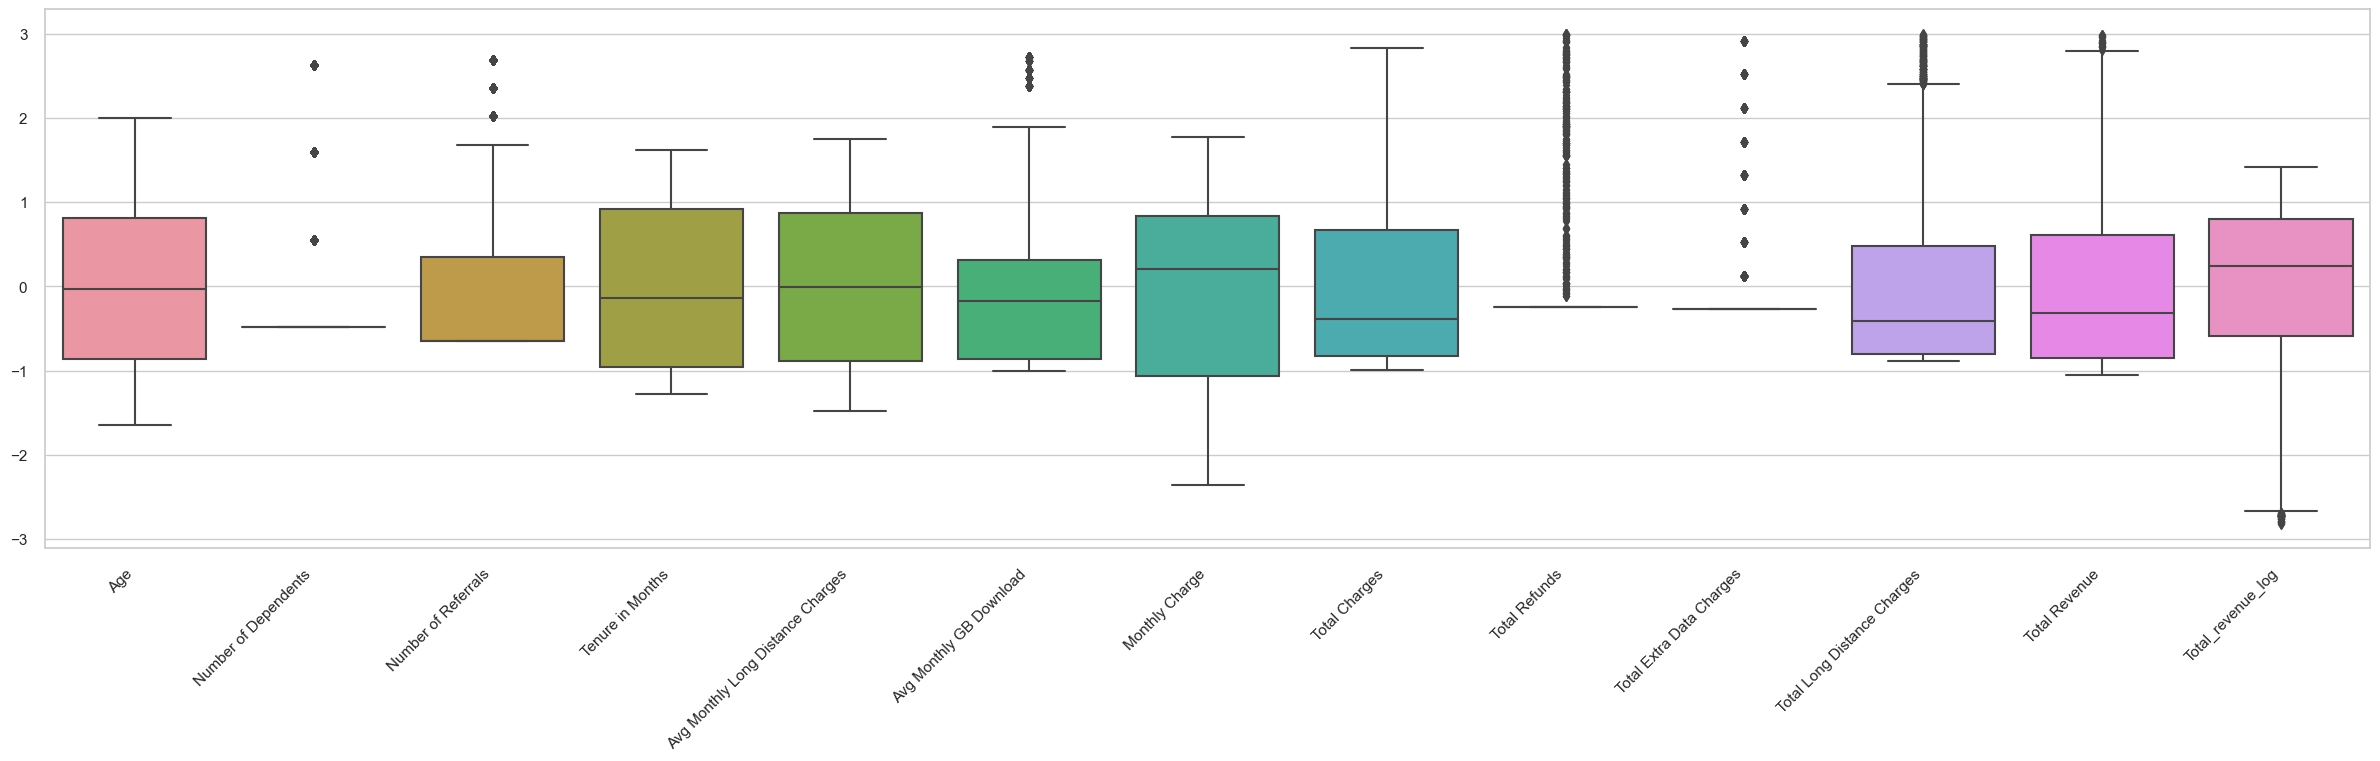

In [34]:
# Checking the Ranges of the predictor variables and dependent variable in Num_list after normalization and removing outlier
plt.figure(figsize=(30, 7))
sns.boxplot(df[numerical_data])
plt.xticks(rotation=45, ha="right")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Married'),
  Text(3, 0, 'Number of Dependents'),
  Text(4, 0, 'Number of Referrals'),
  Text(5, 0, 'Tenure in Months'),
  Text(6, 0, 'Offer'),
  Text(7, 0, 'Phone Service'),
  Text(8, 0, 'Avg Monthly Long Distance Charges'),
  Text(9, 0, 'Multiple Lines'),
  Text(10, 0, 'Internet Service'),
  Text(11, 0, 'Internet Type'),
  Text(12, 0, 'Avg Monthly GB Download'),
  Text(13, 0, 'Online Security'),
  Text(14, 0, 'Online Backup'),
  Text(15, 0, 'Device Protection Plan'),
  Text(16, 0, 'Premium Tech Support'),
  Text(17, 0, 'Streaming TV'),
  Text(18, 0, 'Streaming Movies'),
  Text(19, 0, 'Streaming Music'),
  Text(20, 0, 'Unlimited Data'),
  Text(21, 0, 'Contract'),
  Text(22, 0, 'Paperless Billing'),
  Text(23, 0, 'Payment Method'),
  Text(24, 0, 'Monthly Charge'),
  Text(25, 0, 'Total 

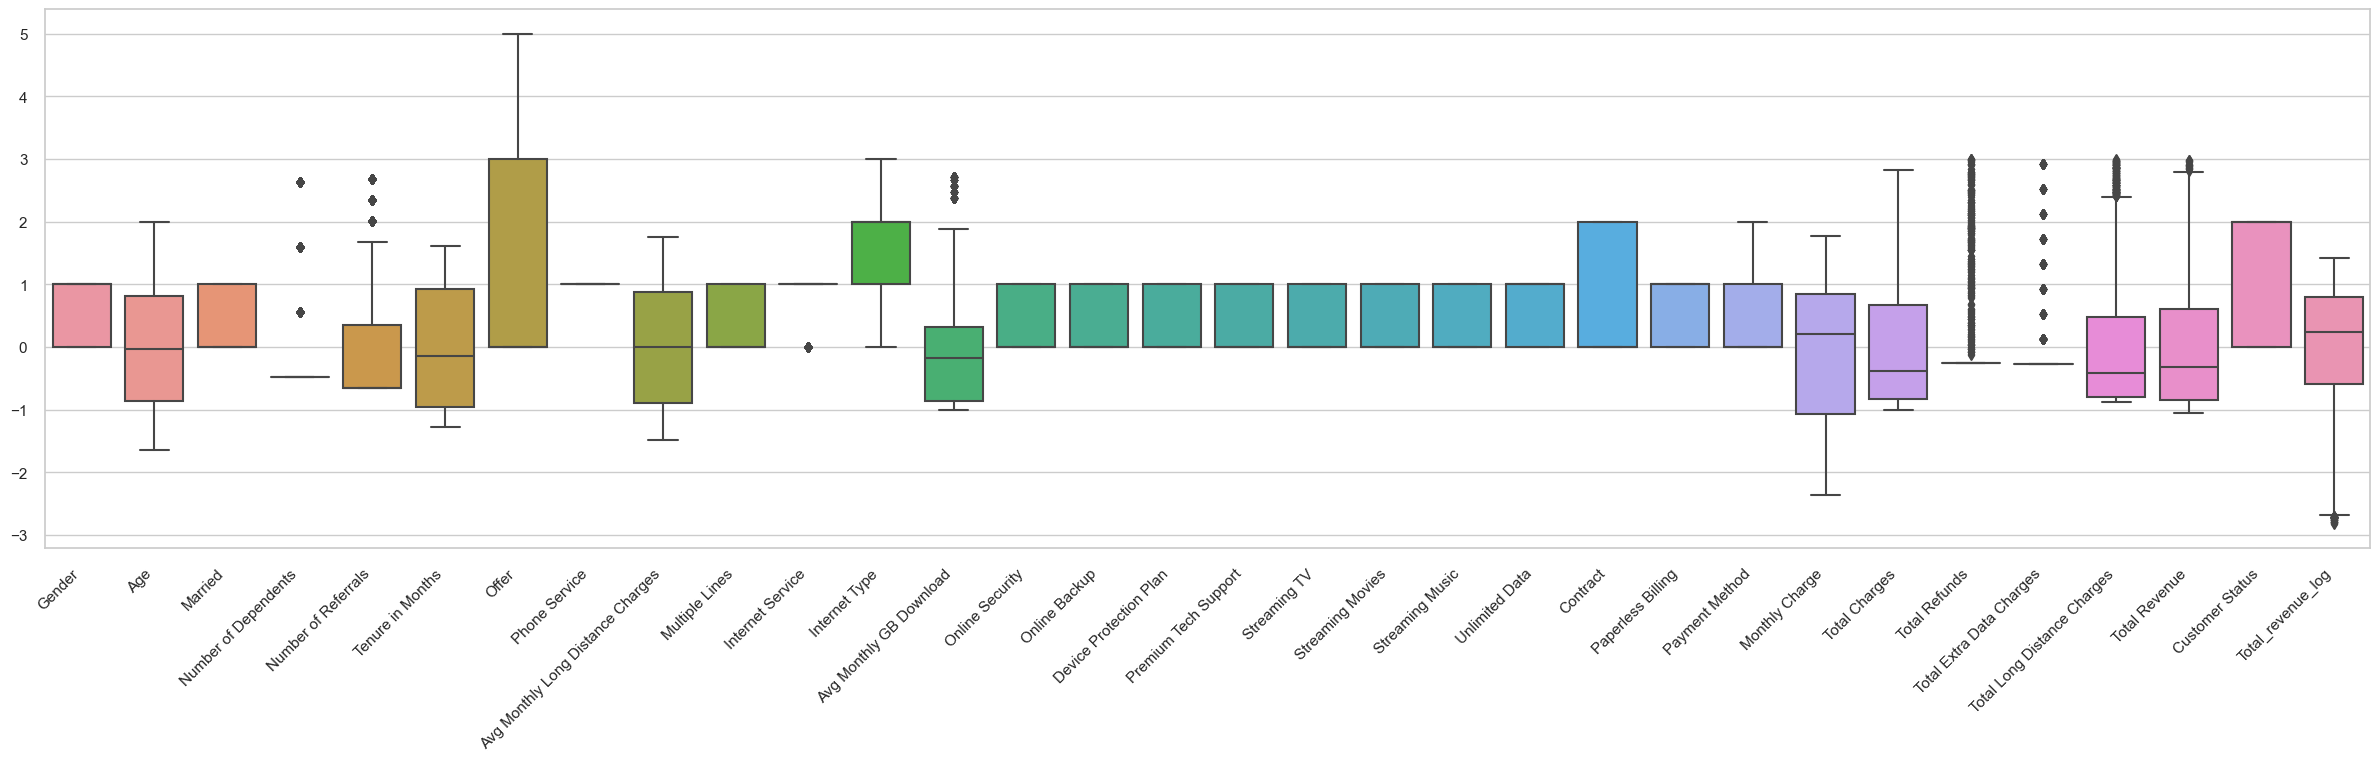

In [35]:
plt.figure(figsize=(30, 7))
sns.boxplot(df)
plt.xticks(rotation=45, ha="right")

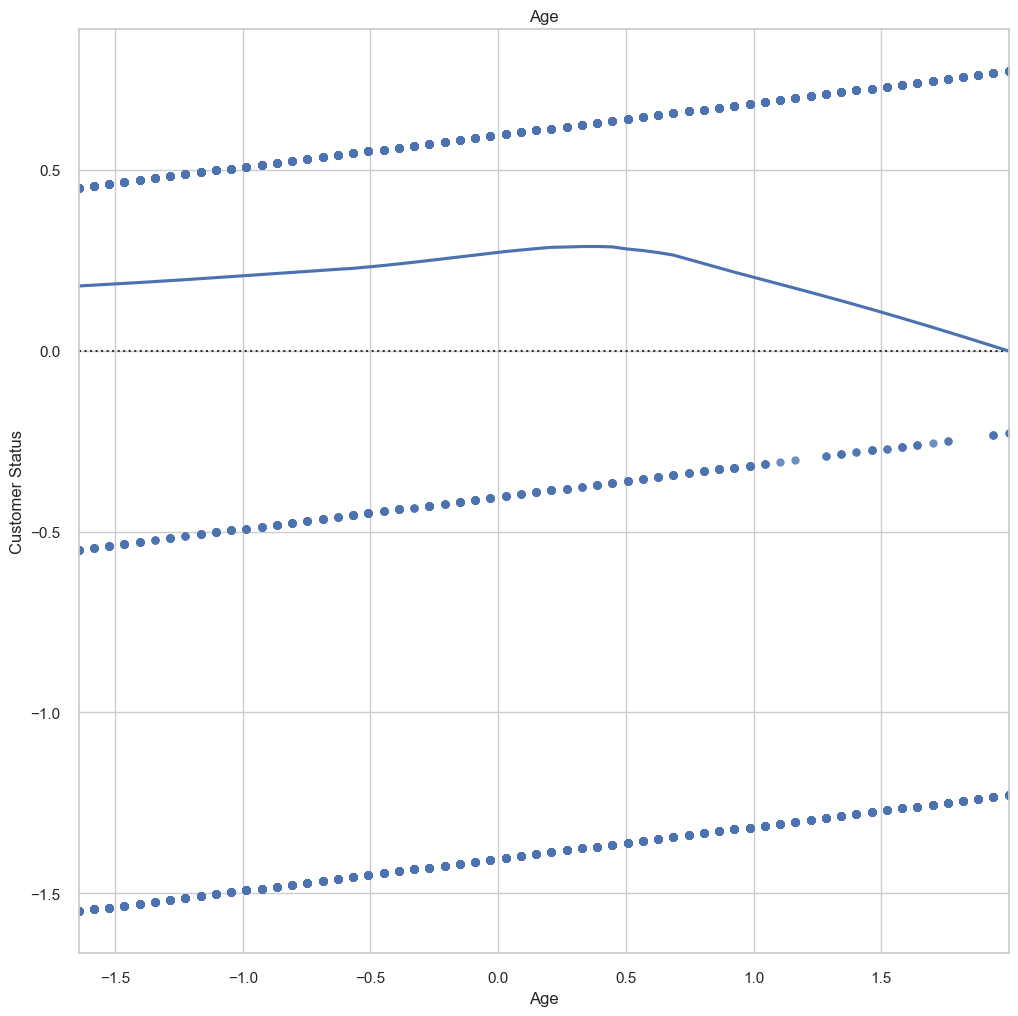

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



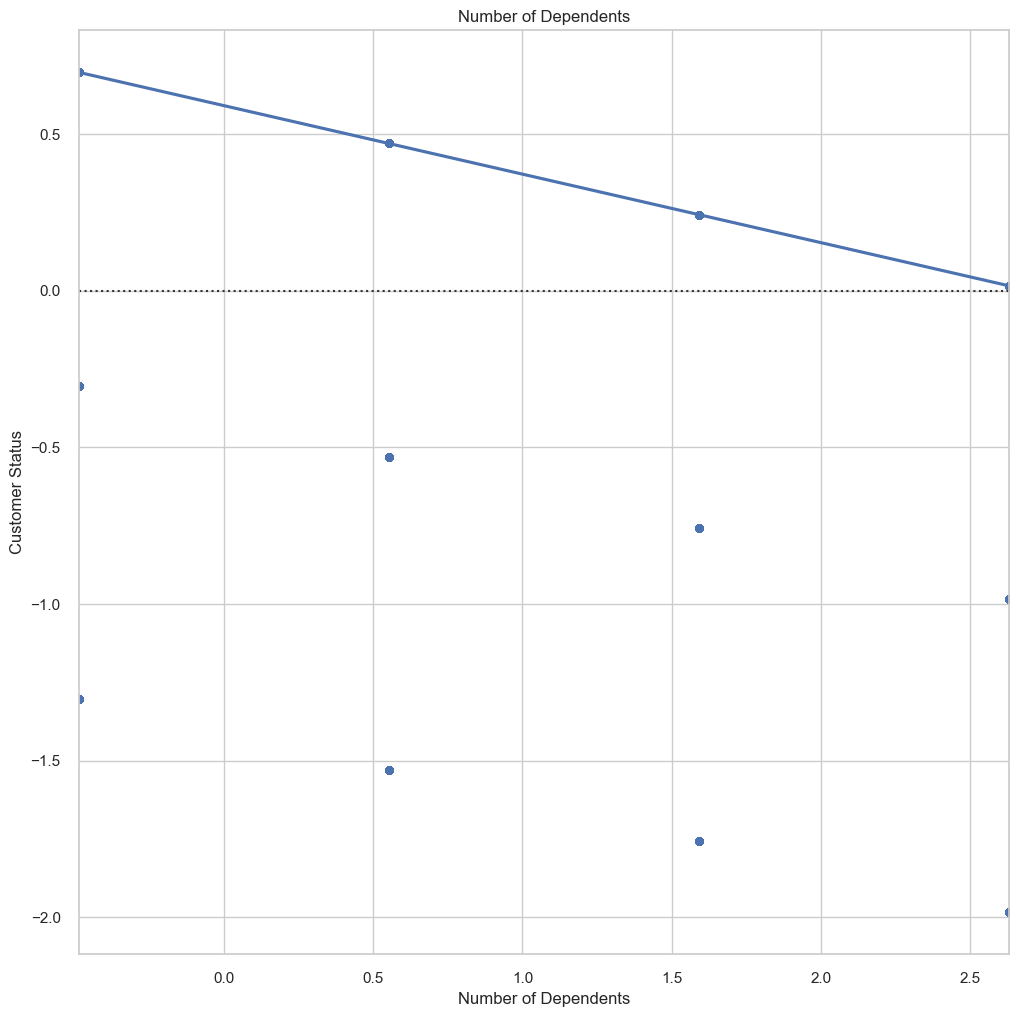

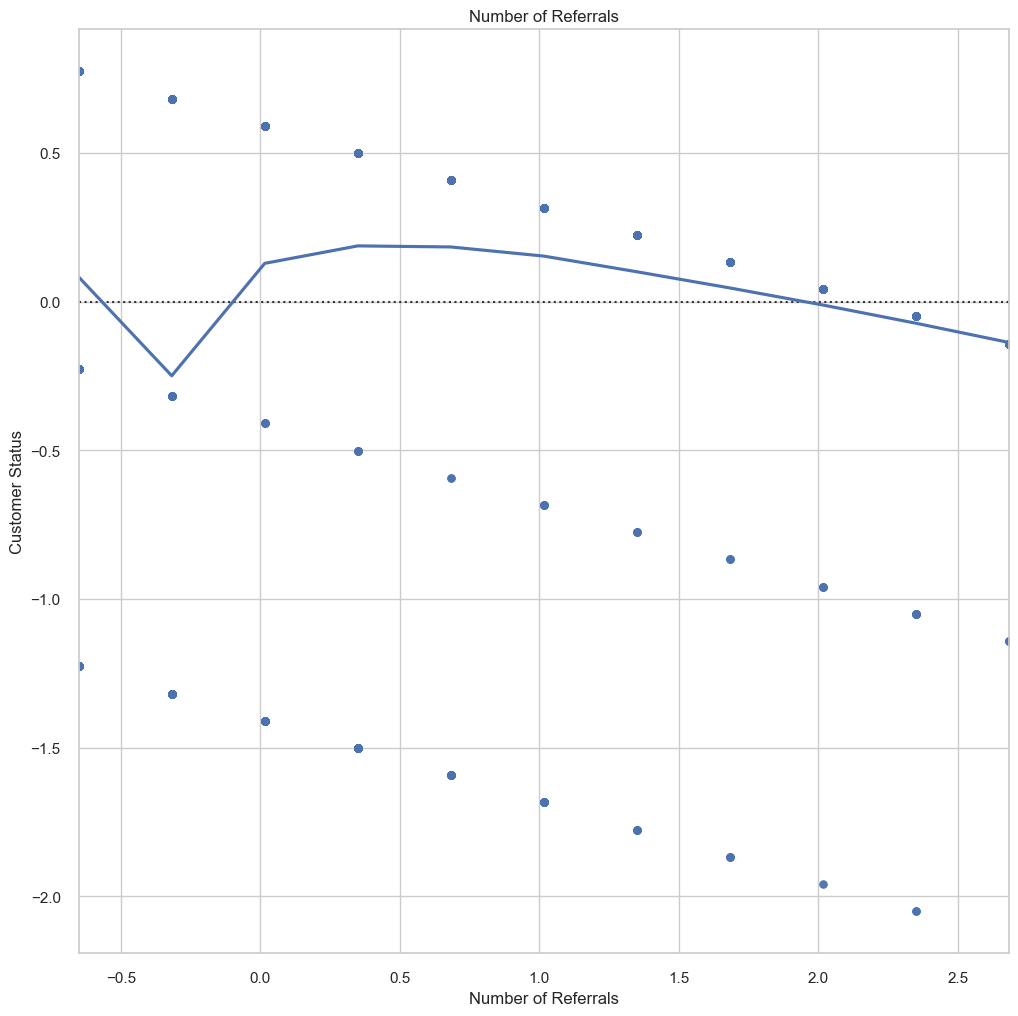

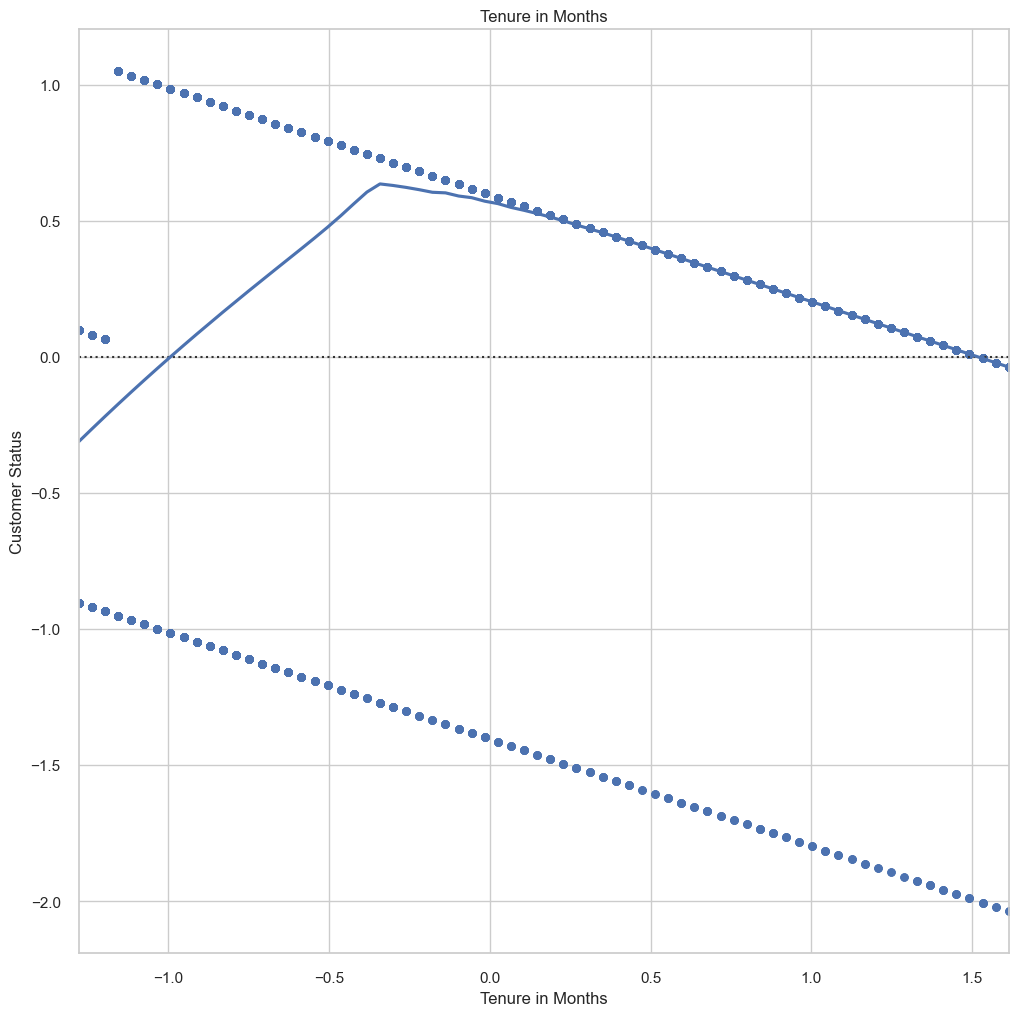

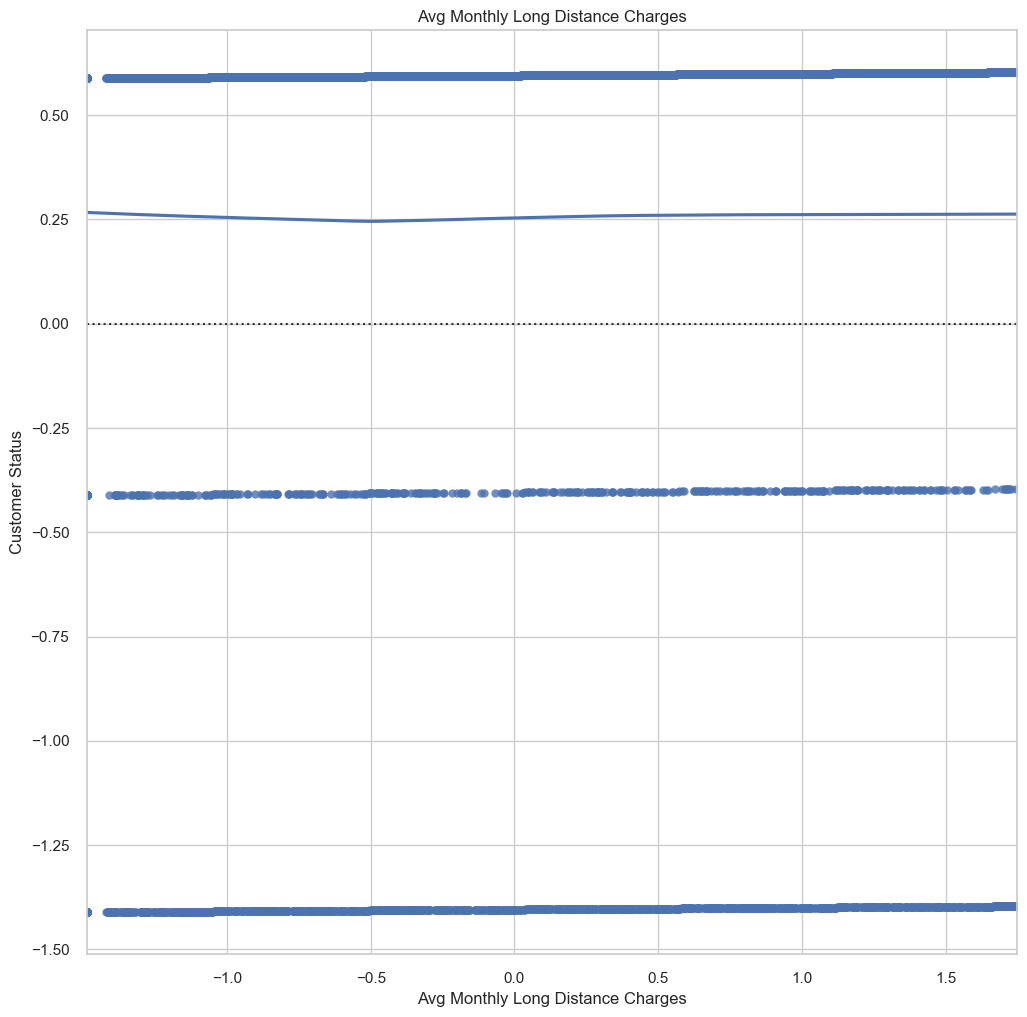

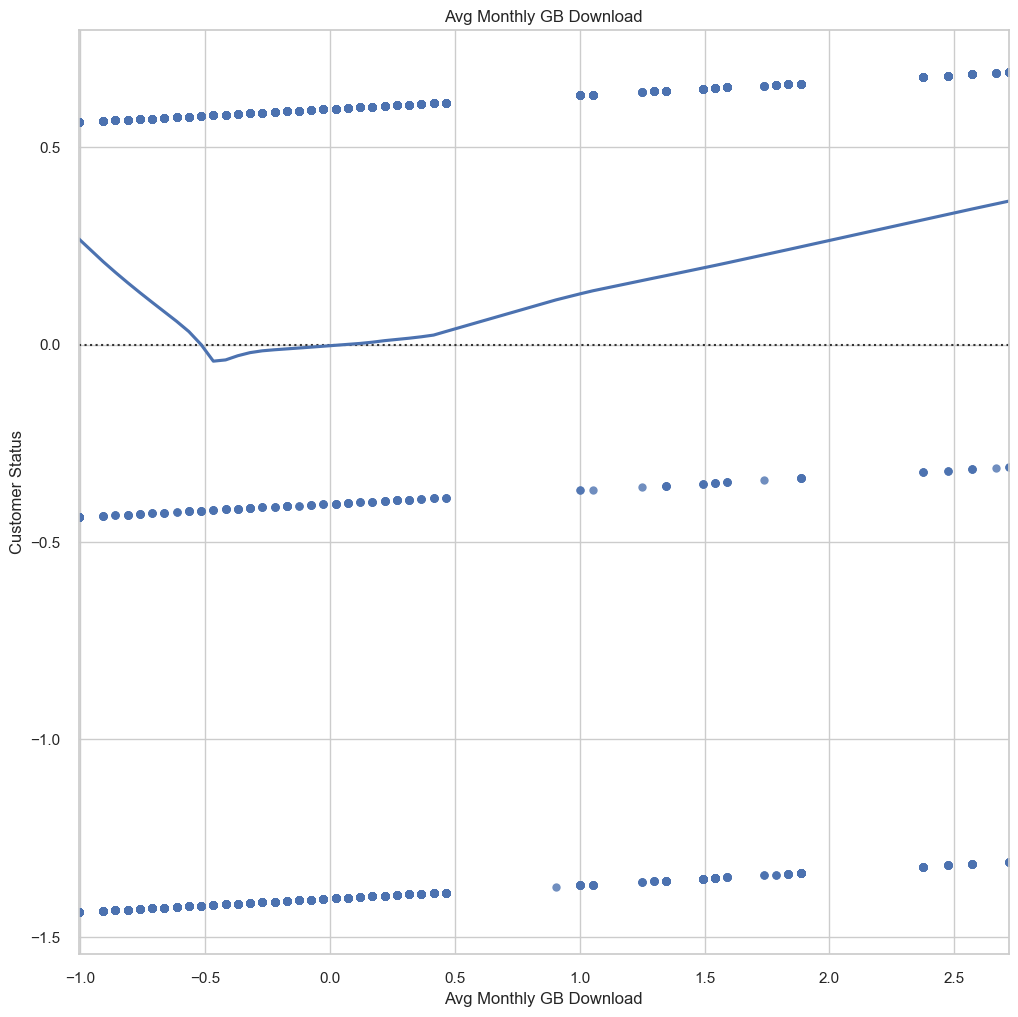

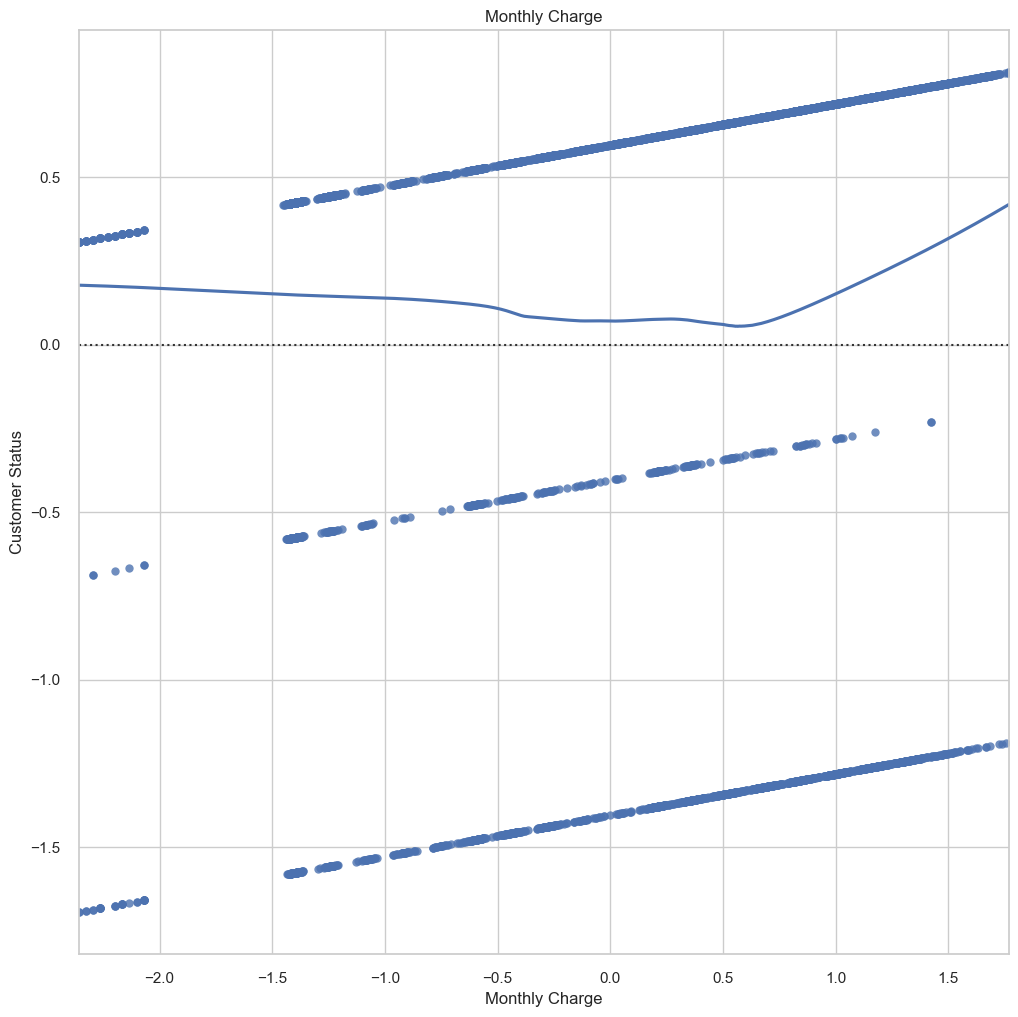

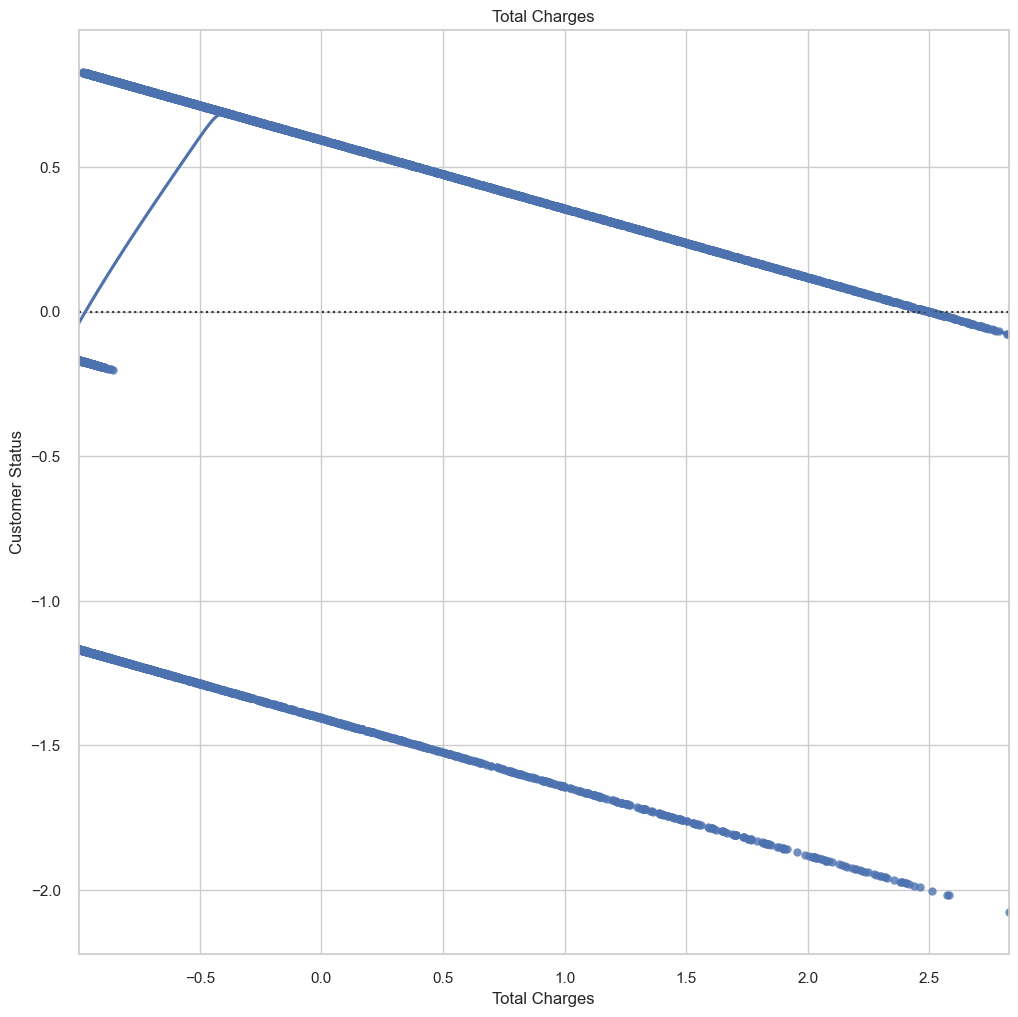

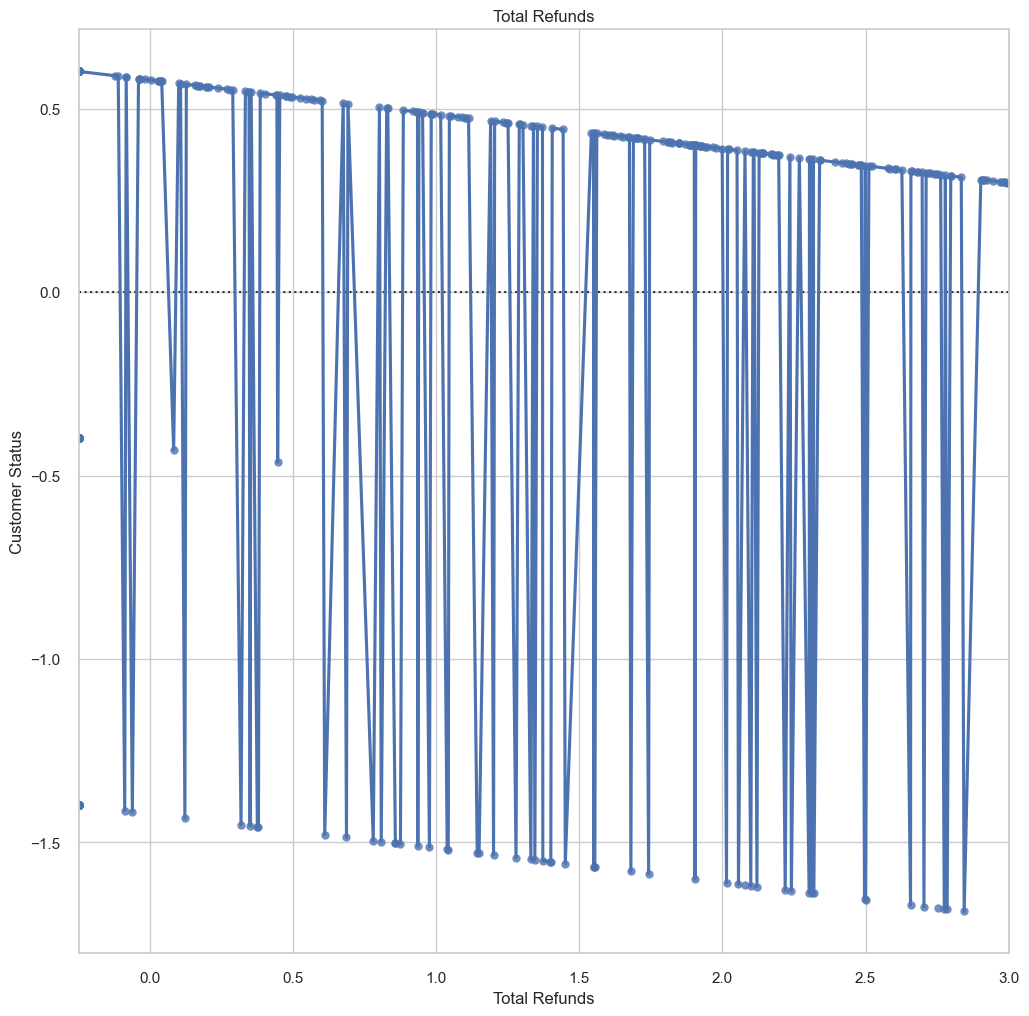

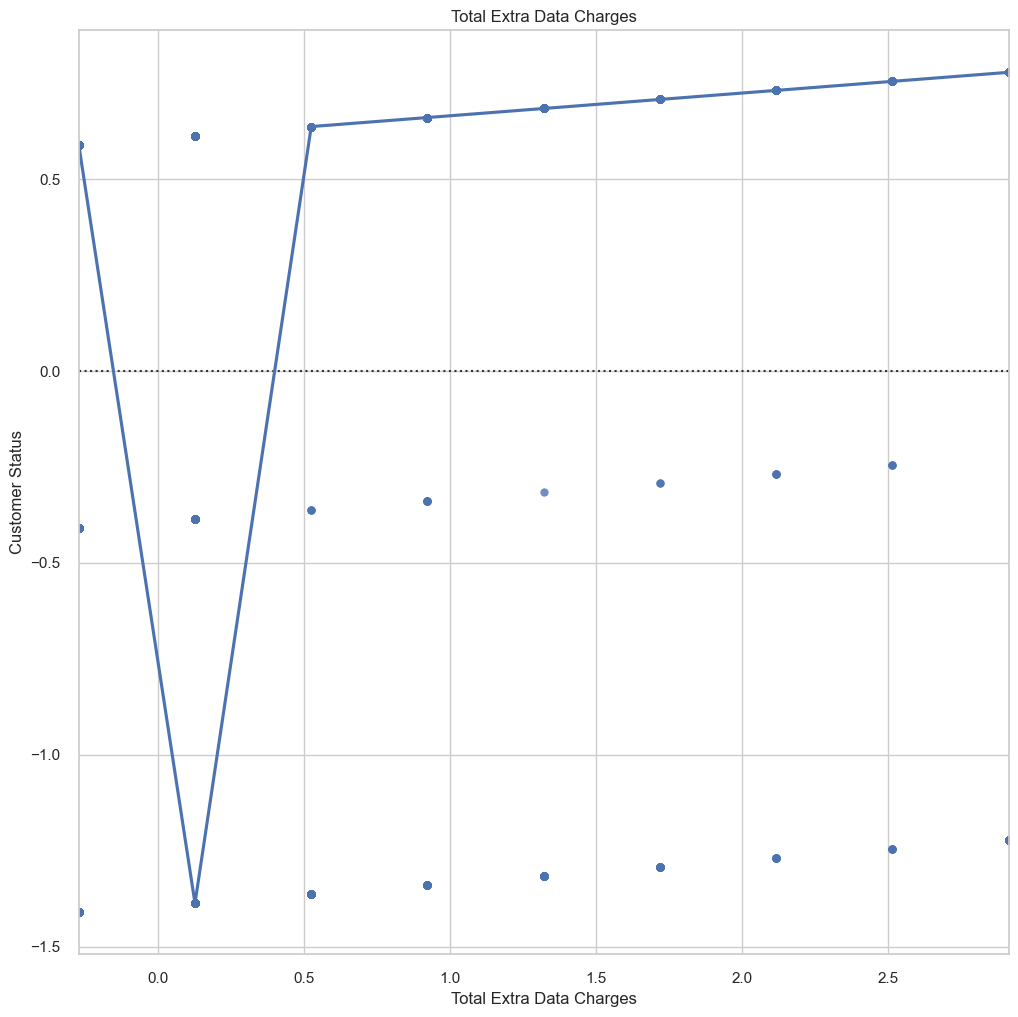

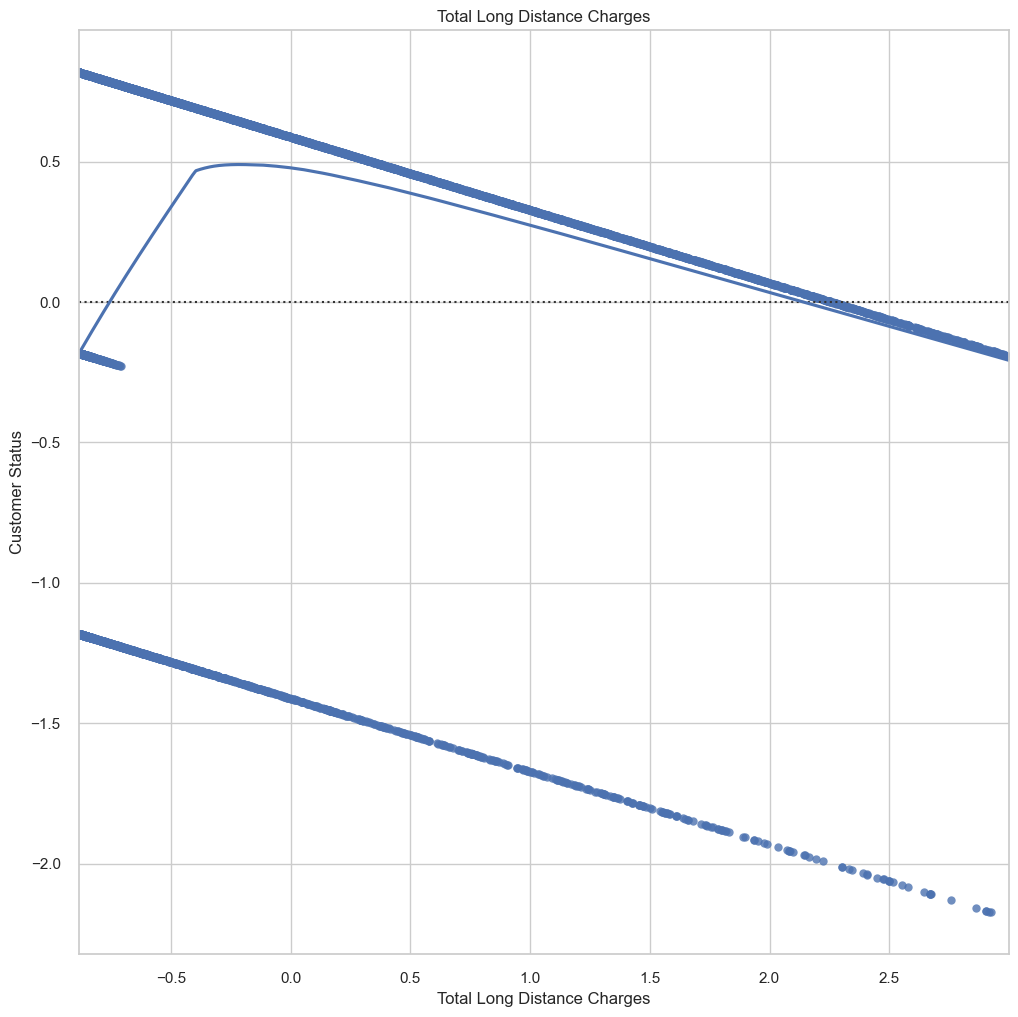

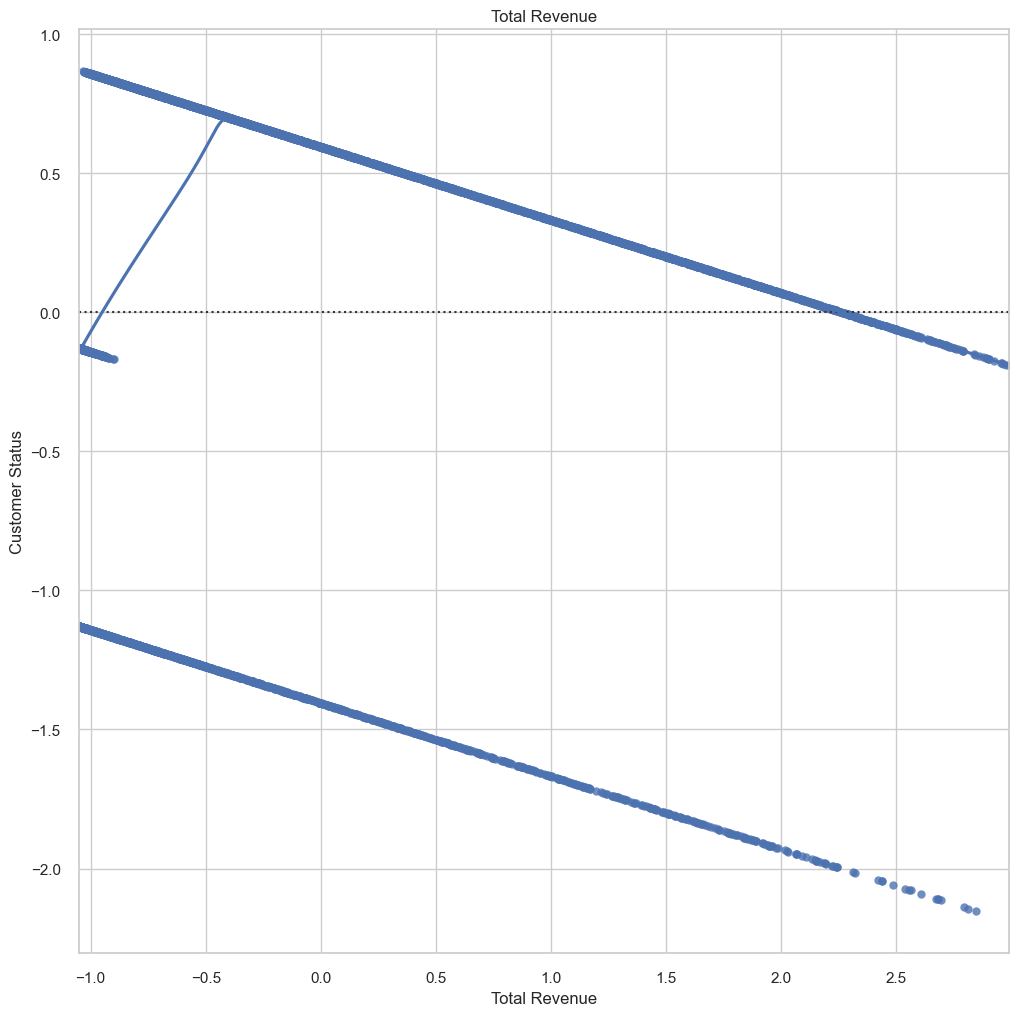

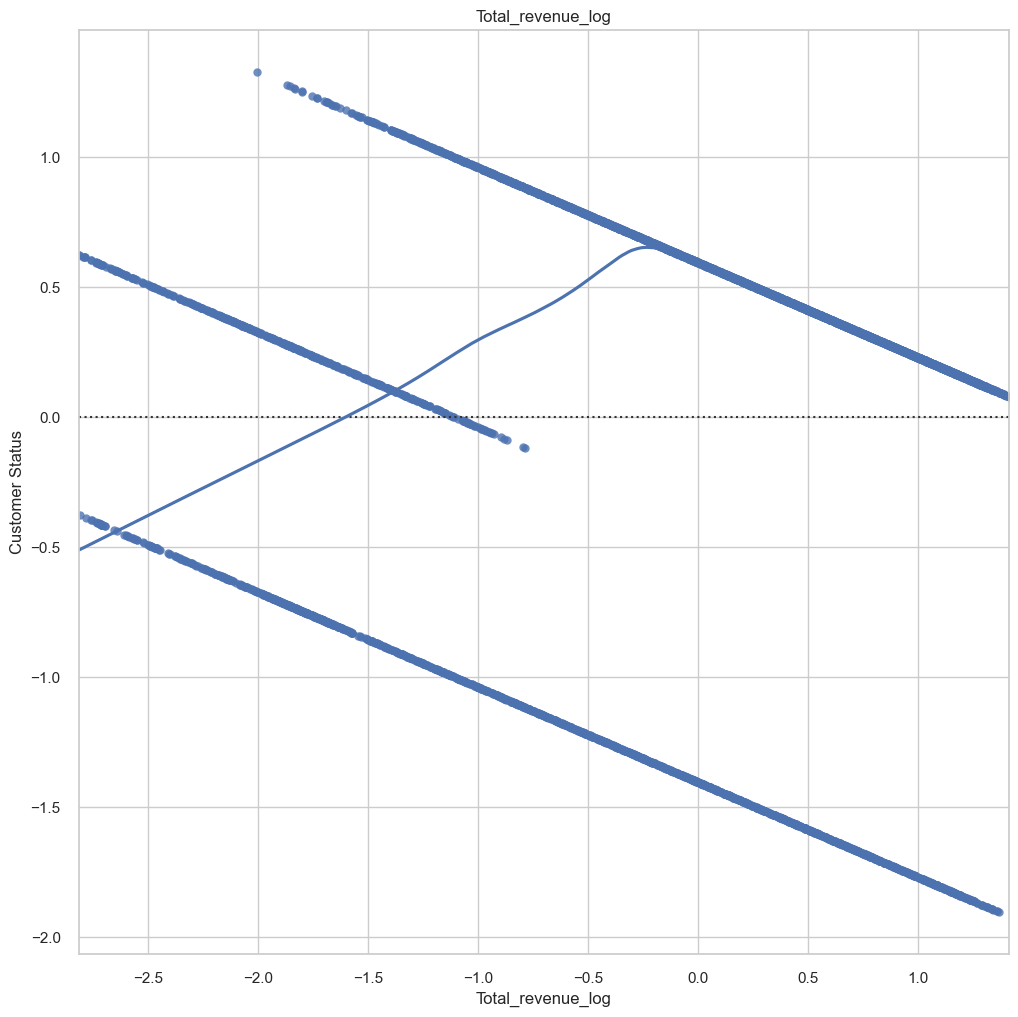

In [36]:
# outlier treatment  residual plot

for i in numerical_data:
  plt.figure(figsize=(12,12))
  sns.residplot(x=df[i], y=df['Customer Status'], lowess=True)
  plt.title(i)
  plt.show()

Residual Plots
Residual Plot is strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price.
A ideal Residual Plot, the red line would be horizontal. Based on the below charts, most features are non-linear. On the other hand, there are not many outliers in each feature.

# Dimension Reduction

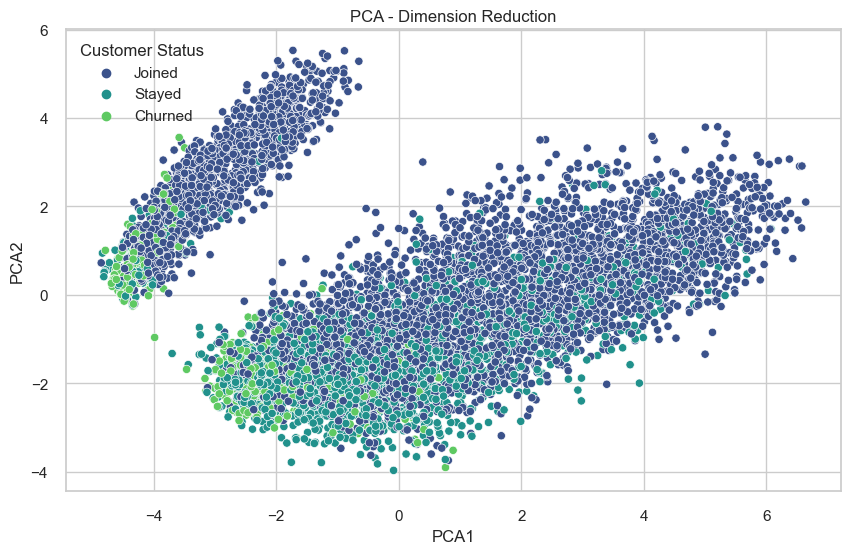

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the DataFrame to keep the original unchanged
df_copy = df.copy()

# Replace numerical labels with corresponding categorical labels in the copied DataFrame
df_copy['Customer Status'] = df_copy['Customer Status'].replace({0: 'Stayed', 1: 'Churned', 2: 'Joined'})

# Assuming X is your feature matrix
X = df_copy.drop(['Customer Status', 'Total_revenue_log'], axis=1)

# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Customer Status'] = df_copy['Customer Status']

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Customer Status', data=pca_df, palette='viridis')
plt.title('PCA - Dimension Reduction')
plt.show()


The graph provides a valuable visual summary of the customer data after dimensionality reduction. Further analysis and exploration of the underlying features and their correlations with the principal components would yield deeper insights into customer behavior and segmentation.

# Model Performance Evaluation and Interpretation

In [38]:
df.head()

Gender       Age  Married  Number of Dependents  Number of Referrals   
0       0 -0.567773        1             -0.486835             0.016039  \
1       1 -0.030433        0             -0.486835            -0.650409   
2       1  0.208385        0             -0.486835            -0.650409   
3       1  1.880110        1             -0.486835            -0.317185   
4       0  1.700997        1             -0.486835             0.349263   

   Tenure in Months  Offer  Phone Service  Avg Monthly Long Distance Charges   
0         -0.952994      0              1                           1.257916  \
1         -0.952994      0              1                          -0.794260   
2         -1.156740      5              1                           0.692111   
3         -0.789997      4              1                           0.314692   
4         -1.197489      0              1                          -1.008541   

   Multiple Lines  ...  Paperless Billing  Payment Method  Monthly Charge   
0               0  ...                  1               1        0.064221  \
1               1  ...                  0               1       -2.166367   
2               0  ...                  1               0        0.330225   
3               0  ...                  1               0        1.102599   
4               0  ...                  1               1        0.650712   

   Total Charges  Total Refunds  Total Extra Data Charges   
0      -0.744500      -0.248313                 -0.273300  \
1      -0.766962      -0.248313                  0.125055   
2      -0.882382      -0.248313                 -0.273300   
3      -0.460063      -0.248313                 -0.273300   
4      -0.888318      -0.248313                 -0.273300   

   Total Long Distance Charges  Total Revenue  Customer Status   
0                    -0.434195      -0.718872                2  \
1                    -0.771190      -0.846108                2   
2                    -0.725844      -0.914111                0   
3                    -0.457641      -0.500827                0   
4                    -0.858681      -0.958059                0   

   Total_revenue_log  
0          -0.275361  
1          -0.590140  
2          -0.848437  
3           0.057655  
4          -1.090740  

[5 rows x 32 columns]

In [39]:
df

Gender       Age  Married  Number of Dependents  Number of Referrals   
0          0 -0.567773        1             -0.486835             0.016039  \
1          1 -0.030433        0             -0.486835            -0.650409   
2          1  0.208385        0             -0.486835            -0.650409   
3          1  1.880110        1             -0.486835            -0.317185   
4          0  1.700997        1             -0.486835             0.349263   
...      ...       ...      ...                   ...                  ...   
7038       0 -1.582749        0             -0.486835            -0.650409   
7039       1 -0.388660        1             -0.486835            -0.317185   
7040       1 -1.463340        0             -0.486835            -0.650409   
7041       1 -1.523045        1             -0.486835             1.015710   
7042       1 -0.627478        1             -0.486835            -0.317185   

      Tenure in Months  Offer  Phone Service   
0            -0.952994      0              1  \
1            -0.952994      0              1   
2            -1.156740      5              1   
3            -0.789997      4              1   
4            -1.197489      0              1   
...                ...    ...            ...   
7038         -0.789997      4              1   
7039         -0.423253      4              1   
7040         -1.238238      5              1   
7041          1.410464      1              1   
7042          1.247467      0              1   

      Avg Monthly Long Distance Charges  Multiple Lines  ...   
0                              1.257916               0  ...  \
1                             -0.794260               1  ...   
2                              0.692111               0  ...   
3                              0.314692               0  ...   
4                             -1.008541               0  ...   
...                                 ...             ...  ...   
7038                           1.535639               0  ...   
7039                          -0.437557               1  ...   
7040                          -0.280893               0  ...   
7041                          -1.349060               0  ...   
7042                          -1.486303               0  ...   

      Paperless Billing  Payment Method  Monthly Charge  Total Charges   
0                     1               1        0.064221      -0.744500  \
1                     0               1       -2.166367      -0.766962   
2                     1               0        0.330225      -0.882382   
3                     1               0        1.102599      -0.460063   
4                     1               1        0.650712      -0.888318   
...                 ...             ...             ...            ...   
7038                  0               1       -0.270687      -0.678482   
7039                  1               0        0.689171      -0.179466   
7040                  1               1       -0.426124      -0.965390   
7041                  0               1        0.136331       1.035837   
7042                  0               0       -0.147300       0.629824   

      Total Refunds  Total Extra Data Charges  Total Long Distance Charges   
0         -0.248313                 -0.273300                    -0.434195  \
1         -0.248313                  0.125055                    -0.771190   
2         -0.248313                 -0.273300                    -0.725844   
3         -0.248313                 -0.273300                    -0.457641   
4         -0.248313                 -0.273300                    -0.858681   
...             ...                       ...                          ...   
7038      -0.248313                 -0.273300                    -0.168036   
7039      -0.248313                 -0.273300                    -0.463855   
7040      -0.248313                 -0.273300                    -0.840845   
7041      -0.248313                 -0.273300         

In [40]:
data = df

In [41]:
data = data.loc[data['Customer Status'] != 1]
data.reset_index(drop=True, inplace=True)
data

Gender       Age  Married  Number of Dependents  Number of Referrals   
0          0 -0.567773        1             -0.486835             0.016039  \
1          1 -0.030433        0             -0.486835            -0.650409   
2          1  0.208385        0             -0.486835            -0.650409   
3          1  1.880110        1             -0.486835            -0.317185   
4          0  1.700997        1             -0.486835             0.349263   
...      ...       ...      ...                   ...                  ...   
6584       0 -0.627478        0             -0.486835            -0.650409   
6585       0 -1.582749        0             -0.486835            -0.650409   
6586       1 -0.388660        1             -0.486835            -0.317185   
6587       1 -1.523045        1             -0.486835             1.015710   
6588       1 -0.627478        1             -0.486835            -0.317185   

      Tenure in Months  Offer  Phone Service   
0            -0.952994      0              1  \
1            -0.952994      0              1   
2            -1.156740      5              1   
3            -0.789997      4              1   
4            -1.197489      0              1   
...                ...    ...            ...   
6584         -1.156740      0              1   
6585         -0.789997      4              1   
6586         -0.423253      4              1   
6587          1.410464      1              1   
6588          1.247467      0              1   

      Avg Monthly Long Distance Charges  Multiple Lines  ...   
0                              1.257916               0  ...  \
1                             -0.794260               1  ...   
2                              0.692111               0  ...   
3                              0.314692               0  ...   
4                             -1.008541               0  ...   
...                                 ...             ...  ...   
6584                          -1.356181               0  ...   
6585                           1.535639               0  ...   
6586                          -0.437557               1  ...   
6587                          -1.349060               0  ...   
6588                          -1.486303               0  ...   

      Paperless Billing  Payment Method  Monthly Charge  Total Charges   
0                     1               1        0.064221      -0.744500  \
1                     0               1       -2.166367      -0.766962   
2                     1               0        0.330225      -0.882382   
3                     1               0        1.102599      -0.460063   
4                     1               1        0.650712      -0.888318   
...                 ...             ...             ...            ...   
6584                  0               0       -1.366752      -0.968589   
6585                  0               1       -0.270687      -0.678482   
6586                  1               0        0.689171      -0.179466   
6587                  0               1        0.136331       1.035837   
6588                  0               0       -0.147300       0.629824   

      Total Refunds  Total Extra Data Charges  Total Long Distance Charges   
0         -0.248313                 -0.273300                    -0.434195  \
1         -0.248313                  0.125055                    -0.771190   
2         -0.248313                 -0.273300                    -0.725844   
3         -0.248313                 -0.273300                    -0.457641   
4         -0.248313                 -0.273300                    -0.858681   
...             ...                       ...                          ...   
6584      -0.248313                 -0.273300                    -0.875336   
6585      -0.248313                 -0.273300                    -0.168036   
6586      -0.248313                 -0.273300                    -0.463855   
6587      -0.248313                 -0.273300         

In [42]:

data['Customer Status'].replace(2, 1, inplace=True)
data

C:\Users\rohit\AppData\Local\Temp\ipykernel_21372\687659451.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Gender       Age  Married  Number of Dependents  Number of Referrals   
0          0 -0.567773        1             -0.486835             0.016039  \
1          1 -0.030433        0             -0.486835            -0.650409   
2          1  0.208385        0             -0.486835            -0.650409   
3          1  1.880110        1             -0.486835            -0.317185   
4          0  1.700997        1             -0.486835             0.349263   
...      ...       ...      ...                   ...                  ...   
6584       0 -0.627478        0             -0.486835            -0.650409   
6585       0 -1.582749        0             -0.486835            -0.650409   
6586       1 -0.388660        1             -0.486835            -0.317185   
6587       1 -1.523045        1             -0.486835             1.015710   
6588       1 -0.627478        1             -0.486835            -0.317185   

      Tenure in Months  Offer  Phone Service   
0            -0.952994      0              1  \
1            -0.952994      0              1   
2            -1.156740      5              1   
3            -0.789997      4              1   
4            -1.197489      0              1   
...                ...    ...            ...   
6584         -1.156740      0              1   
6585         -0.789997      4              1   
6586         -0.423253      4              1   
6587          1.410464      1              1   
6588          1.247467      0              1   

      Avg Monthly Long Distance Charges  Multiple Lines  ...   
0                              1.257916               0  ...  \
1                             -0.794260               1  ...   
2                              0.692111               0  ...   
3                              0.314692               0  ...   
4                             -1.008541               0  ...   
...                                 ...             ...  ...   
6584                          -1.356181               0  ...   
6585                           1.535639               0  ...   
6586                          -0.437557               1  ...   
6587                          -1.349060               0  ...   
6588                          -1.486303               0  ...   

      Paperless Billing  Payment Method  Monthly Charge  Total Charges   
0                     1               1        0.064221      -0.744500  \
1                     0               1       -2.166367      -0.766962   
2                     1               0        0.330225      -0.882382   
3                     1               0        1.102599      -0.460063   
4                     1               1        0.650712      -0.888318   
...                 ...             ...             ...            ...   
6584                  0               0       -1.366752      -0.968589   
6585                  0               1       -0.270687      -0.678482   
6586                  1               0        0.689171      -0.179466   
6587                  0               1        0.136331       1.035837   
6588                  0               0       -0.147300       0.629824   

      Total Refunds  Total Extra Data Charges  Total Long Distance Charges   
0         -0.248313                 -0.273300                    -0.434195  \
1         -0.248313                  0.125055                    -0.771190   
2         -0.248313                 -0.273300                    -0.725844   
3         -0.248313                 -0.273300                    -0.457641   
4         -0.248313                 -0.273300                    -0.858681   
...             ...                       ...                          ...   
6584      -0.248313                 -0.273300                    -0.875336   
6585      -0.248313                 -0.273300                    -0.168036   
6586      -0.248313                 -0.273300                    -0.463855   
6587      -0.248313                 -0.273300         

To avoid the biasness in the predictions i have dropped the customers information that joined the company recently

#PreModel Training

In [43]:
X = data.drop(columns = "Customer Status")
y = data["Customer Status"].values


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [45]:
col=['Total Charges','Avg Monthly Long Distance Charges','Monthly Charge','Total Revenue','Total Long Distance Charges',
     'Tenure in Months','Total Long Distance Charges','Total Extra Data Charges']

In [46]:
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

# Model Training without Optimization

In [47]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Kernel SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [48]:
acc_results =[]
auc_results =[]
pre_results =[]
f1_results =[]
names = []

result_col = ["Algorithm", "ROC AUC", "Accuracy", "Precision", "f1 Score"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    # kfold = model_selection.KFold(n_splits=10)

    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train,scoring = "accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                     scoring="roc_auc")
    cv_pre_results = model_selection.cross_val_score(model, X_train, y_train,
                     scoring="precision_micro")
    cv_f1_results = model_selection.cross_val_score(model, X_train, y_train,
                     scoring="f1_micro")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    pre_results.append(cv_pre_results)
    f1_results.append(cv_f1_results)

    model_results.loc[i] = [name,
                           round(cv_acc_results.mean()*100,2),
                           round(cv_auc_results.mean()*100,2),
                           round(cv_pre_results.mean()*100,2),
                           round(cv_f1_results.mean()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC'], ascending=False)

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

Algorithm  ROC AUC  Accuracy  Precision  f1 Score
4             Random Forest    86.60     92.00      86.90     86.64
1                Kernel SVM    86.19     91.30      86.19     86.19
0       Logistic Regression    86.01     92.24      86.01     86.01
2                       KNN    82.61     86.73      82.61     82.61
5  Decision Tree Classifier    81.72     77.22      81.59     81.66
3               Gaussian NB    80.23     88.12      80.23     80.23

## Finding Good Hyper Parameters on above models indiviually

### Decision Tree Classifier

In [49]:
modelD= DecisionTreeClassifier()


In [50]:
modelD.fit(X_train, y_train)


DecisionTreeClassifier()

In [51]:
pred_train_D = modelD.predict(X_train)
pred_test_D=modelD.predict(X_test)

In [52]:
acc_train_D = accuracy_score(pred_train_D, y_train)
acc_test_D = accuracy_score(pred_test_D, y_test)
print(f'Training accuracy {acc_train_D: .3f}')
print(f'Testing accuracy {acc_test_D: .3f}')

Training accuracy  1.000
Testing accuracy  0.831


Tuning the parameters

In [53]:
tuned_parameters = [{'criterion':['gini', 'entropy'],
                     'max_leaf_nodes': range(5,25)}] # hyperparameters to tune

clf_D = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clf_D.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clf_D.best_params_) # best hyperparameter balues

print("\nGrid scores:")
means_D = clf_D.cv_results_['mean_test_score'] # mean accuracy with folds
stds_D = clf_D.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means_D, stds_D, clf_D.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best parameters found:
{'criterion': 'gini', 'max_leaf_nodes': 19}

Grid scores:
0.844 (+/-0.022) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.851 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.853 (+/-0.010) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.857 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.857 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.856 (+/-0.010) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.856 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.856 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 12}
0.860 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 13}
0.860 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 14}
0.860 (+/-0.016) for {'criterion': 'gini', 'max_leaf_nodes': 15}
0.861 (+/-0.020) for {'criterion': 'gini', 'max_leaf_nodes': 16}
0.861 (+/-0.018) for {'criterion': 'gini', 'max_leaf_nodes': 17}
0.862 (+/-0.018)

DecisionTreeClassifier(max_leaf_nodes=19)
Results on test data
Test accuracy =  0.8548
Test precision =  0.8630
Test recall =  0.9477
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.62      0.71       561
           1       0.86      0.95      0.90      1416

    accuracy                           0.85      1977
   macro avg       0.84      0.78      0.81      1977
weighted avg       0.85      0.85      0.85      1977

Confusion matrix (Rows actual, Columns predicted):
     0     1
0  348   213
1   74  1342

ROC curve


C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



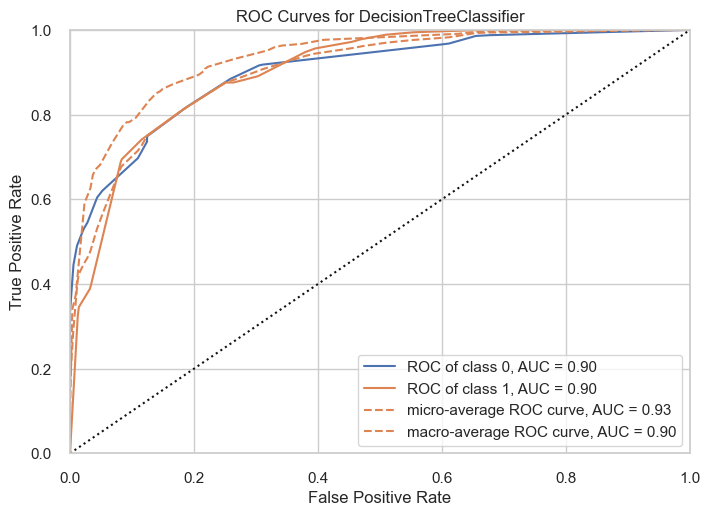

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
criterion = 'gini'
max_leaf_nodes = 19
# Train and test model
good_model_D = DecisionTreeClassifier(criterion=criterion,
                                    max_leaf_nodes=max_leaf_nodes) # create model
print(good_model_D) # display model parameters
good_model_D.fit(X_train, y_train) # train model
pred_D = good_model_D.predict(X_test) # predicted output for test examples
print("Results on test data")
acc_D = accuracy_score(y_test, pred_D) # accuracy on test examples
prec_D = precision_score(y_test, pred_D) # precision on test examples
reca_D = recall_score(y_test, pred_D) # recall on test examples
print(f'Test accuracy = {acc_D: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_D: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_D: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_D))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_D)))
print('\nROC curve')
visualizer = ROCAUC(good_model_D, classes=['0', '1'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Random Forest Model

In [55]:
modelR = RandomForestClassifier()


In [56]:
modelR.fit(X_train, y_train)


RandomForestClassifier()

In [57]:
pred_train = modelR.predict(X_train)
pred_test=modelR.predict(X_test)

In [58]:
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)
print(f'Training accuracy {acc_train: .3f}')
print(f'Testing accuracy {acc_test: .3f}')

Training accuracy  1.000
Testing accuracy  0.872


Tuning the parameters

In [59]:
tuned_parameters = [{'n_estimators': [25, 50, 75],
                     'max_features': [15, 20, 25],
                     'max_leaf_nodes': [8, 16, 24]}] # hyperparameters to tune

clfR = GridSearchCV(RandomForestClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfR.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfR.best_params_) # best hyperparameter values

print("\nGrid scores:")
means = clfR.cv_results_['mean_test_score'] # mean accuracy with folds
stds = clfR.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means, stds, clfR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters found:
{'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 75}

Grid scores:
0.861 (+/-0.009) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 25}
0.863 (+/-0.019) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 50}
0.863 (+/-0.019) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 75}
0.869 (+/-0.011) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 25}
0.869 (+/-0.017) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 50}
0.869 (+/-0.016) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 75}
0.871 (+/-0.013) for {'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 25}
0.869 (+/-0.011) for {'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 50}
0.873 (+/-0.016) for {'max_features': 15, 'max_leaf_nodes': 24, 'n_estimators': 75}
0.865 (+/-0.014) for {'max_features': 20, 'max_leaf_nodes': 8, 'n_estimators': 25}
0

Evaluating Random forest classifier with selected hyper-parameters

RandomForestClassifier(max_features=15, max_leaf_nodes=16, n_estimators=50)
Results on test data
Test accuracy =  0.8609
Test precision =  0.8674
Test recall =  0.9513
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       561
           1       0.87      0.95      0.91      1416

    accuracy                           0.86      1977
   macro avg       0.85      0.79      0.81      1977
weighted avg       0.86      0.86      0.85      1977

Confusion matrix (Rows actual, Columns predicted):
     0     1
0  355   206
1   69  1347

ROC curve


C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



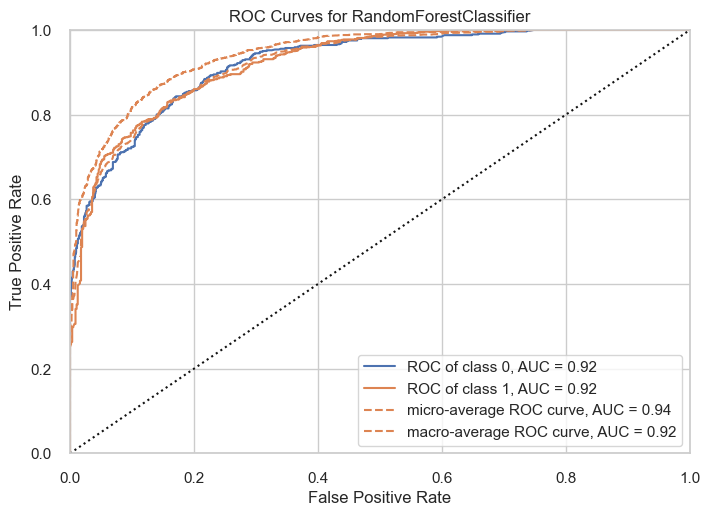

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
# Specify non-default hyper-parameter values
max_features = 15
max_leaf_nodes = 16
n_estimators = 50
# Train and test model
good_model = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes,
                                    max_features = max_features,
                                    n_estimators=n_estimators, ) # create model
print(good_model) # display model parameters
good_model.fit(X_train, y_train) # train model
pred = good_model.predict(X_test) # predicted output for test examples
print("Results on test data")
acc = accuracy_score(y_test, pred) # accuracy on test examples
prec = precision_score(y_test, pred) # precision on test examples
reca = recall_score(y_test, pred) # recall on test examples
print(f'Test accuracy = {acc: .4f}') # round to 4 decimal places
print(f'Test precision = {prec: .4f}') # round to 4 decimal places
print(f'Test recall = {reca: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred)))
print('\nROC curve')
visualizer = ROCAUC(good_model, classes=['0', '1'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Logistic Regression

In [61]:
modelL=LogisticRegression()


In [62]:
modelL.fit(X_train,y_train)


C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [63]:
pred_trainL = modelL.predict(X_train)
pred_testL=modelL.predict(X_test)

In [64]:
acc_trainL = accuracy_score(pred_trainL, y_train)
acc_testL = accuracy_score(pred_testL, y_test)
print(f'Training accuracy {acc_trainL: .3f}')
print(f'Testing accuracy {acc_testL: .3f}')

Training accuracy  0.866
Testing accuracy  0.863


Tuning the parameters

In [65]:
tuned_parameters = [{'C': [10.0, 100.0, 1000.0, 10000.0],
                     'max_iter': [500, 1000]}] # hyperparameters to tune


clfL = GridSearchCV(LogisticRegression(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfL.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfL.best_params_) # best hyperparameter values

print("\nGrid scores:")
meansL = clfL.cv_results_['mean_test_score'] # mean accuracy with folds
stdsL = clfL.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansL, stdsL, clfL.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters found:
{'C': 10000.0, 'max_iter': 500}

Grid scores:
0.861 (+/-0.020) for {'C': 10.0, 'max_iter': 500}
0.861 (+/-0.020) for {'C': 10.0, 'max_iter': 1000}
0.861 (+/-0.020) for {'C': 100.0, 'max_iter': 500}
0.861 (+/-0.020) for {'C': 100.0, 'max_iter': 1000}
0.861 (+/-0.020) for {'C': 1000.0, 'max_iter': 500}
0.861 (+/-0.020) for {'C': 1000.0, 'max_iter': 1000}
0.861 (+/-0.020) for {'C': 10000.0, 'max_iter': 500}
0.861 (+/-0.020) for {'C': 10000.0, 'max_iter': 1000}


Evaluation based on the best found parameters

LogisticRegression(C=1000, max_iter=1000)
Results on test data
Test accuracy =  0.8644
Test precision =  0.8948
Test recall =  0.9188
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       561
           1       0.89      0.92      0.91      1416

    accuracy                           0.86      1977
   macro avg       0.84      0.82      0.83      1977
weighted avg       0.86      0.86      0.86      1977

Confusion matrix (Rows actual, Columns predicted):
     0     1
0  408   153
1  115  1301

ROC curve


C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



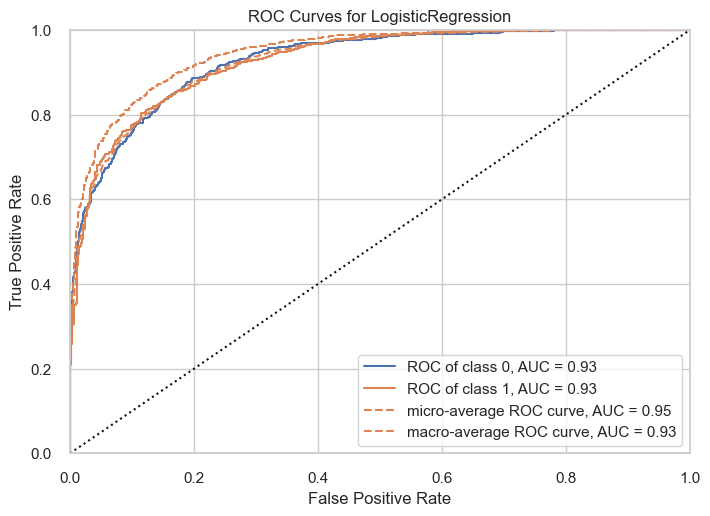

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
# Specify non-default hyper-parameter values
C = 1000
max_iter = 1000
# Train and test model
good_modelL = LogisticRegression(C = C, max_iter=max_iter) # create model
print(good_modelL) # display model parameters
good_modelL.fit(X_train,y_train) # train model
predL = good_modelL.predict(X_test) # predicted output for test examples
print("Results on test data")
accL = accuracy_score(y_test, predL) # accuracy on test examples
precL = precision_score(y_test, predL) # precision on test examples
recaL = recall_score(y_test, predL) # recall on test examples
print(f'Test accuracy = {accL: .4f}') # round to 4 decimal places
print(f'Test precision = {precL: .4f}') # round to 4 decimal places
print(f'Test recall = {recaL: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predL))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predL)))
print('\nROC curve')
visualizer = ROCAUC(good_modelL, classes=['0', '1'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

KNN Model

In [67]:
modelknn= KNeighborsClassifier().fit(X_train,y_train)


In [68]:
pred_trainknn = modelknn.predict(X_train)
pred_testknn=modelknn.predict(X_test)

In [69]:
acc_trainknn = accuracy_score(pred_trainknn, y_train)
acc_testknn = accuracy_score(pred_testknn, y_test)
print(f'Training accuracy {acc_trainknn: .3f}')
print(f'Testing accuracy {acc_testknn: .3f}')

Training accuracy  0.887
Testing accuracy  0.844


In [70]:
tuned_parameters = [{'algorithm':['brute'],
                     'metric': ['euclidean', 'minkowski'],
                    'n_neighbors': [5, 10, 20]}] # hyperparameters to tune

clfknn = GridSearchCV(KNeighborsClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfknn.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfknn.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansknn = clfknn.cv_results_['mean_test_score'] # mean accuracy with folds
stdsknn = clfknn.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansknn, stdsknn, clfknn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters found:
{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}

Grid scores:
0.826 (+/-0.014) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5}
0.833 (+/-0.014) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 10}
0.835 (+/-0.020) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}
0.826 (+/-0.014) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5}
0.833 (+/-0.014) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 10}
0.835 (+/-0.020) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 20}


Evaluation on best found parameters

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=20)
Results on test data
Test accuracy =  0.8407
Test precision =  0.8869
Test recall =  0.8912
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       561
           1       0.89      0.89      0.89      1416

    accuracy                           0.84      1977
   macro avg       0.80      0.80      0.80      1977
weighted avg       0.84      0.84      0.84      1977

Confusion matrix (Rows actual, Columns predicted):
     0     1
0  400   161
1  154  1262

ROC curve


C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



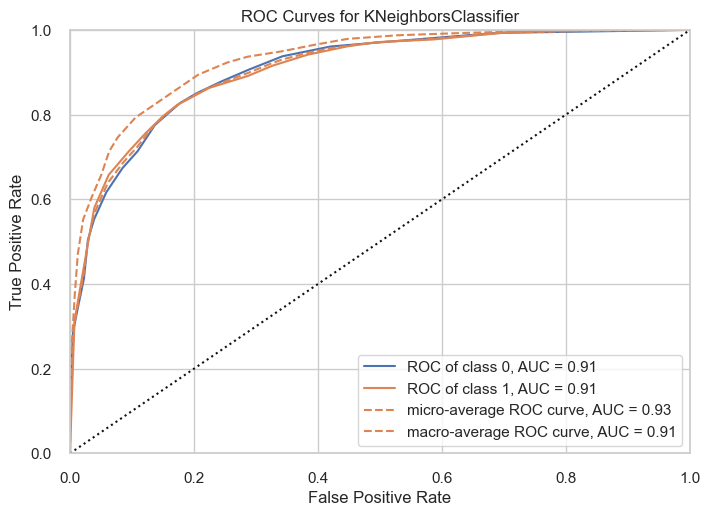

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [71]:
# Specify non-default hyper-parameter values
algorithm = 'brute'
metric = 'euclidean'
n_neighbors =  20
# Train and test model
good_modelknn = KNeighborsClassifier(algorithm=algorithm, metric=metric,
                                  n_neighbors=n_neighbors) # create model
print(good_modelknn) # display model parameters
good_modelknn.fit(X_train, y_train) # train model
predknn = good_modelknn.predict(X_test) # predicted output for test examples
print("Results on test data")
accknn = accuracy_score(y_test, predknn) # accuracy on test examples
precknn = precision_score(y_test, predknn) # precision on test examples
recaknn = recall_score(y_test, predknn) # recall on test examples
print(f'Test accuracy = {accknn: .4f}') # round to 4 decimal places
print(f'Test precision = {precknn: .4f}') # round to 4 decimal places
print(f'Test recall = {recaknn: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predknn))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predknn)))
print('\nROC curve')
visualizer = ROCAUC(good_modelknn, classes=['0', '1'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Support Vector Machines

In [72]:
modelsvm=svm.SVC().fit(X_train,y_train)


In [73]:
pred_trainsvm = modelsvm.predict(X_train)
pred_testsvm=modelsvm.predict(X_test)


In [74]:
acc_trainsvm = accuracy_score(pred_trainsvm, y_train)
acc_testsvm = accuracy_score(pred_testsvm, y_test)
print(f'Training accuracy {acc_trainsvm: .3f}')
print(f'Testing accuracy {acc_testsvm: .3f}')

Training accuracy  0.883
Testing accuracy  0.866


Tuning the Hyper parameters

In [75]:
tuned_parameters = [{'kernel':['linear'], 'gamma':[1], 'C':[1]}]
                     # hyperparameters to tune

clfsvm = GridSearchCV(svm.SVC(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfsvm.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfsvm.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansvm = clfsvm.cv_results_['mean_test_score'] # mean accuracy with folds
stdsvm = clfsvm.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansvm, stdsvm, clfsvm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters found:
{'C': 1, 'gamma': 1, 'kernel': 'linear'}

Grid scores:
0.858 (+/-0.022) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}


Evaluation based on best parameters

SVC(C=1, gamma=0.1, kernel='linear')
Results on test data
Test accuracy =  0.8629
Test precision =  0.8892
Test recall =  0.9237
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       561
           1       0.89      0.92      0.91      1416

    accuracy                           0.86      1977
   macro avg       0.84      0.82      0.83      1977
weighted avg       0.86      0.86      0.86      1977

Confusion matrix (Rows actual, Columns predicted):
     0     1
0  398   163
1  108  1308

ROC curve


C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



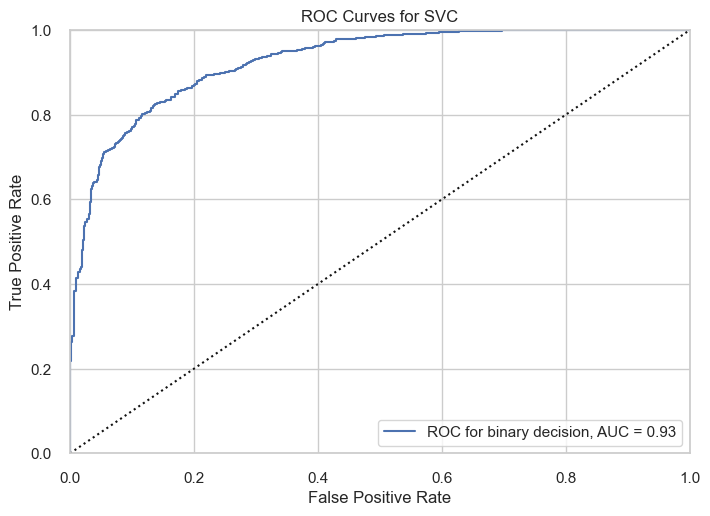

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [76]:
# Specify non-default hyper-parameter values
C = 1 # algorithm name
kernel = 'linear'# kernel type
gamma =  0.1 # kernel parameter
# Train and test model
good_modelsvm = svm.SVC(C=C, kernel=kernel,
                                  gamma=gamma) # create model
print(good_modelsvm) # display model parameters
good_modelsvm.fit(X_train,y_train) # train model
predsvm = good_modelsvm.predict(X_test) # predicted output for test examples
print("Results on test data")
accsvm = accuracy_score(y_test, predsvm) # accuracy on test examples
precsvm = precision_score(y_test, predsvm) # precision on test examples
recasvm = recall_score(y_test, predsvm) # recall on test examples
print(f'Test accuracy = {accsvm: .4f}') # round to 4 decimal places
print(f'Test precision = {precsvm: .4f}') # round to 4 decimal places
print(f'Test recall = {recasvm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predsvm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predsvm)))
print('\nROC curve')
visualizer = ROCAUC(good_modelsvm, classes=['0', '1'],binary = True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Getting Combined Results from the tuned models

In [77]:
models_opt = []

models_opt.append(('Logistic Regression', LogisticRegression(solver='liblinear',C = 1000, max_iter=1000, random_state = 0)))
models_opt.append(('SVC', SVC(C=1, kernel = 'linear', gamma=1, random_state = 0)))
models_opt.append(('Kernel SVM', SVC(C=1, kernel = 'rbf', gamma=1, random_state = 0)))
models_opt.append(('KNN', KNeighborsClassifier(n_neighbors = 20, metric = 'euclidean', p = 2,algorithm='brute')))
models_opt.append(('Gaussian NB', GaussianNB()))
models_opt.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=19, random_state = 0)))
models_opt.append(('Random Forest', RandomForestClassifier(max_leaf_nodes = 16,max_features = 15,
                                                           n_estimators = 50,criterion = 'entropy', random_state = 0)))

In [78]:
acc_results_opt =[]
auc_results_opt =[]
pre_results_opt =[]
f1_results_opt =[]
names_opt = []

result_col_opt = ["Algorithm", "ROC AUC", "Accuracy", 'Precision', 'F1 Scores']
model_results_opt = pd.DataFrame(columns = result_col_opt)

i=0
# K- fold cross validation

for name, model in models:
    names_opt.append(name)
    kfold = model_selection.KFold(n_splits=10)

    cv_acc_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="accuracy")
    cv_auc_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    cv_pre_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="precision")
    cv_f1_results_opt = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="f1")
    acc_results_opt.append(cv_acc_results_opt)
    auc_results_opt.append(cv_auc_results_opt)
    pre_results_opt.append(cv_pre_results_opt)
    f1_results_opt.append(cv_f1_results_opt)
    model_results_opt.loc[i] = [name,
                           round(cv_auc_results_opt.mean()*100,2),
                           round(cv_acc_results_opt.mean()*100,2),
                           round(cv_pre_results_opt.mean()*100,2),
                           round(cv_f1_results_opt.mean()*100,2)]
    i+=1

model_results_opt.sort_values(by = ['ROC AUC'], ascending=False)

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

Algorithm  ROC AUC  Accuracy  Precision  F1 Scores
0       Logistic Regression    92.21     86.04      89.26      90.36
4             Random Forest    91.96     87.03      88.03      91.09
1                Kernel SVM    91.40     85.88      88.26      90.38
3               Gaussian NB    88.10     80.38      90.93      85.48
2                       KNN    87.10     82.74      87.41      88.03
5  Decision Tree Classifier    77.14     81.35      87.60      86.82

Testing Model performances on the test data

In [79]:
acc_results_opt =[]
auc_results_opt =[]
pre_results_opt =[]
f1_results_opt =[]
names_opt = []

result_col_opt = ["Algorithm", "ROC AUC", "Accuracy", 'Precision', 'F1 Scores']
model_results_opt = pd.DataFrame(columns = result_col_opt)

i=0
# K- fold cross validation

for name, model in models:
    names_opt.append(name)
    kfold = model_selection.KFold(n_splits=10)

    cv_acc_results_opt = model_selection.cross_val_score(model, X_test, y_test,
                    cv = kfold, scoring="accuracy")
    cv_auc_results_opt = model_selection.cross_val_score(model, X_test, y_test,
                    cv = kfold, scoring="roc_auc")
    cv_pre_results_opt = model_selection.cross_val_score(model, X_test, y_test,
                    cv = kfold, scoring="precision")
    cv_f1_results_opt = model_selection.cross_val_score(model, X_test, y_test,
                    cv = kfold, scoring="f1")
    acc_results_opt.append(cv_acc_results_opt)
    auc_results_opt.append(cv_auc_results_opt)
    pre_results_opt.append(cv_pre_results_opt)
    f1_results_opt.append(cv_f1_results_opt)
    model_results_opt.loc[i] = [name,
                           round(cv_auc_results_opt.mean()*100,2),
                           round(cv_acc_results_opt.mean()*100,2),
                           round(cv_pre_results_opt.mean()*100,2),
                           round(cv_f1_results_opt.mean()*100,2)]
    i+=1

model_results_opt.sort_values(by = ['ROC AUC'], ascending=False)


C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

Algorithm  ROC AUC  Accuracy  Precision  F1 Scores
0       Logistic Regression    92.68     86.19      89.47      90.43
4             Random Forest    91.94     86.50      87.74      91.08
1                Kernel SVM    91.72     85.99      88.36      90.42
3               Gaussian NB    88.32     79.72      90.40      85.01
2                       KNN    87.60     83.56      87.60      88.66
5  Decision Tree Classifier    79.25     83.11      89.39      87.95